# 20171120CelegansCellLineageComparison

Author: "Xiaolong Cao" 
Date: "2017/11/20"

-----------

1,000,000 subtree were generated in the alignment of embryonic cell lineage of C. elegans. 
# Aims
1. Summarize the score matrix
1. Summarize the 1,000,000 trees
1. Calculate enrichment of paired nodes in aligned trees
1. Combine aligned tree with EPIC data

## set up working directory and load required packages

In [1]:
setwd("C:\\Users\\ATPs\\OneDrive\\Lab\\YangLab\\YangLabSharedProject_Xiaolong\\Celegans\\Lineages")
getwd()

[1] "C:/Users/ATPs/OneDrive/Lab/YangLab/YangLabSharedProject_Xiaolong/Celegans/Lineages"

In [2]:
source("C:\\Users\\ATPs\\Documents\\GitHub\\XCProject\\YangLab\\20171121TreeAlignmentFunctions.R")
library(ggplot2)
library(dplyr)
library(ggtree)
library(gplots)
library(data.table)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: treeio
ggtree v1.10.0  For help: https://guangchuangyu.github.io/ggtree

If you use ggtree in published research, please cite:
Guangchuang Yu, David Smith, Huachen Zhu, Yi Guan, Tommy Tsan-Yuk Lam. ggtree: an R package for visualization and annotation of phylogenetic trees with their covariates and other associated data. Methods in Ecology and Evolution 2017, 8(1):28-36, doi:10.1111/2041-210X.12628

Attaching package: 'ggtree'

The following object is masked from 'package:dplyr':

    collapse


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess


Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



## set up files to use

In [3]:
fname.referenceTree = "fun.alm"
fname.symmetry = "symmetry-sisters.csv"
fname.alignments = "fun1000000.alml"
fname.matrix = "20171126CelegansLineageTreeScoreMatrix.txt"
fname.epic = "20171207EpicTable.txt"

## 1 summarize the scoring matrix

### read in the score matrix

In [4]:
df.matrix <- read.csv(fname.matrix, header = FALSE, sep = " ")

drop the last column, which is "NA"

In [5]:
df.matrix <- df.matrix[1:1341,1:1341]
dim(df.matrix)
tail(df.matrix)

[1] 1341 1341

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1332,V1333,V1334,V1335,V1336,V1337,V1338,V1339,V1340,V1341
1336,0,0,0,0,0,0,0,0,0,0,...,109,41,114,146,270,41,162,112,39,18
1337,0,0,0,0,0,0,0,0,0,0,...,42,168,24,25,41,368,73,43,61,168
1338,0,0,0,0,0,0,0,0,0,0,...,110,52,90,108,162,73,486,268,242,81
1339,0,0,0,0,0,0,0,0,0,0,...,70,44,125,137,112,43,268,488,245,66
1340,0,0,0,0,0,0,0,0,0,0,...,23,39,38,42,39,61,242,245,974,790
1341,0,0,0,0,0,0,0,0,0,0,...,20,98,14,15,18,168,81,66,790,1342


transform to matrix

In [6]:
score.matrix <- as.matrix(df.matrix)
tail(score.matrix)
dim(score.matrix)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V1332,V1333,V1334,V1335,V1336,V1337,V1338,V1339,V1340,V1341
1336,0,0,0,0,0,0,0,0,0,0,...,109,41,114,146,270,41,162,112,39,18
1337,0,0,0,0,0,0,0,0,0,0,...,42,168,24,25,41,368,73,43,61,168
1338,0,0,0,0,0,0,0,0,0,0,...,110,52,90,108,162,73,486,268,242,81
1339,0,0,0,0,0,0,0,0,0,0,...,70,44,125,137,112,43,268,488,245,66
1340,0,0,0,0,0,0,0,0,0,0,...,23,39,38,42,39,61,242,245,974,790
1341,0,0,0,0,0,0,0,0,0,0,...,20,98,14,15,18,168,81,66,790,1342


[1] 1341 1341

### summary of the whole matrix

In [7]:
score.vector <- as.vector(score.matrix)
score.table <- table(score.vector)
print(score.table)

score.vector
      0       1       2       3       4       5       6       7       8       9 
1423936  163104  153247   18122   21209    4672    4801    2012    2133     784 
     10      11      12      13      14      15      16      17      18      19 
    939     402     452     300     365     182     203     116     175      80 
     20      21      22      23      24      25      26      27      28      29 
     89      60      83      52      78      48      57      22      38      38 
     30      31      32      33      34      35      36      37      38      39 
     15      24      27      22      30      12      27      16      20      10 
     40      41      42      43      44      45      47      48      49      50 
     16      12      10      16      14       4       4       5       4       4 
     51      52      53      54      55      56      57      59      60      61 
      6       8       6       8      12       5       6       2       3       4 
     62      63

In [8]:
n.uniquescore <- length(unique(as.vector(score.matrix)))
n.uniquescore

[1] 118

total unique values in score.matrix is 118.

In [9]:
score.df <- as.data.frame(score.table)
score.df$percentage <- score.df$Freq/sum(score.df$Freq)
colnames(score.df) <- c("Score","Freq","percentage")
head(score.df)

Score,Freq,percentage
0,1423936,0.791831755
1,163104,0.090699952
2,153247,0.085218606
3,18122,0.010077402
4,21209,0.011794041
5,4672,0.002598037


### matrix score histogram

In [10]:
#sum(score.df[-c(1:50),]$Freq)
#sum(score.df[-c(1:50),]$percentage)
score.df2 <- score.df[1:50,]
#tail(score.df2)
score.df2[51,] <- c(51,sum(score.df[-c(1:50),]$Freq),sum(score.df[-c(1:50),]$percentage))
score.df2$Score <- as.character(score.df2$Score)
score.df2[51,1] <- ">50"
score.df2$Score <- factor(score.df2$Score, levels = score.df2$Score)

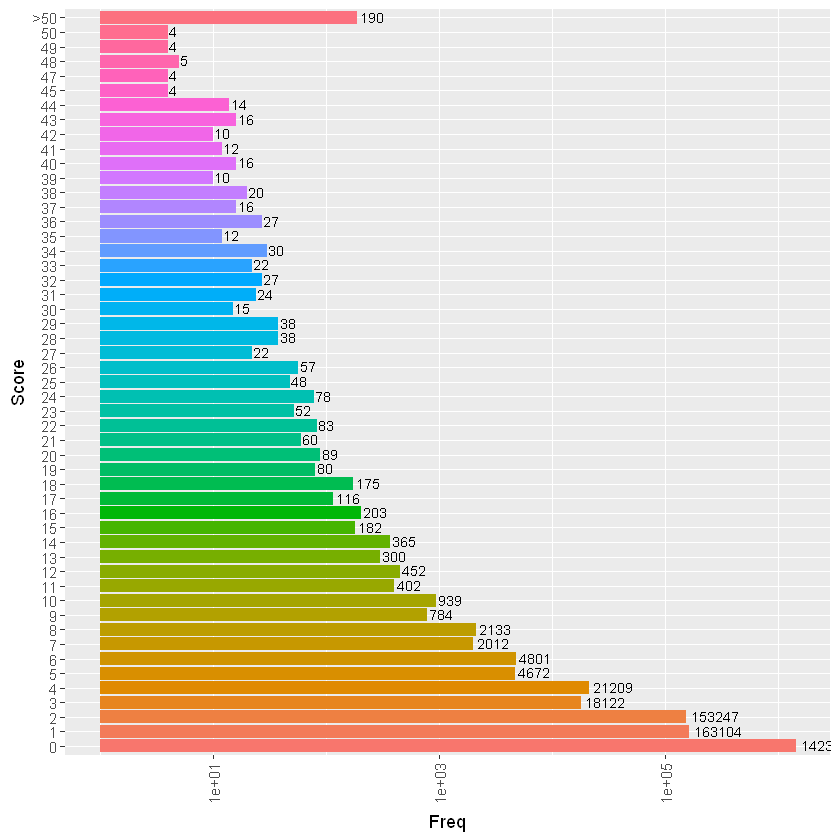

In [11]:

ggplot(score.df2) + 
    geom_bar(aes(x = Score, y = Freq, fill = Score),stat = "identity") + 
    scale_y_log10() + 
    theme(axis.text.x=element_text(angle=90, vjust=0.5,hjust=1)) +
    geom_text(aes(x = Score, y = Freq, label = Freq), size=3,  hjust = -0.1, vjust = 0.4) +
    theme(legend.position = "none") +
    coord_flip()

### label non-symetric parts in score.matrix

In [12]:
sym.matrix = matrix(rep(0,1341*1341), ncol = 1341)
for (i in 1:1341){
    for (j in 1:i){
        if (score.matrix[i,j] != score.matrix[j,i]) {
            sym.matrix[i,j] <- sym.matrix[j,i] <- 1
        }
    }
}
sum(sym.matrix)

[1] 0

conclusion: the score.matrix is symmetric

### heatmap of score.matrix

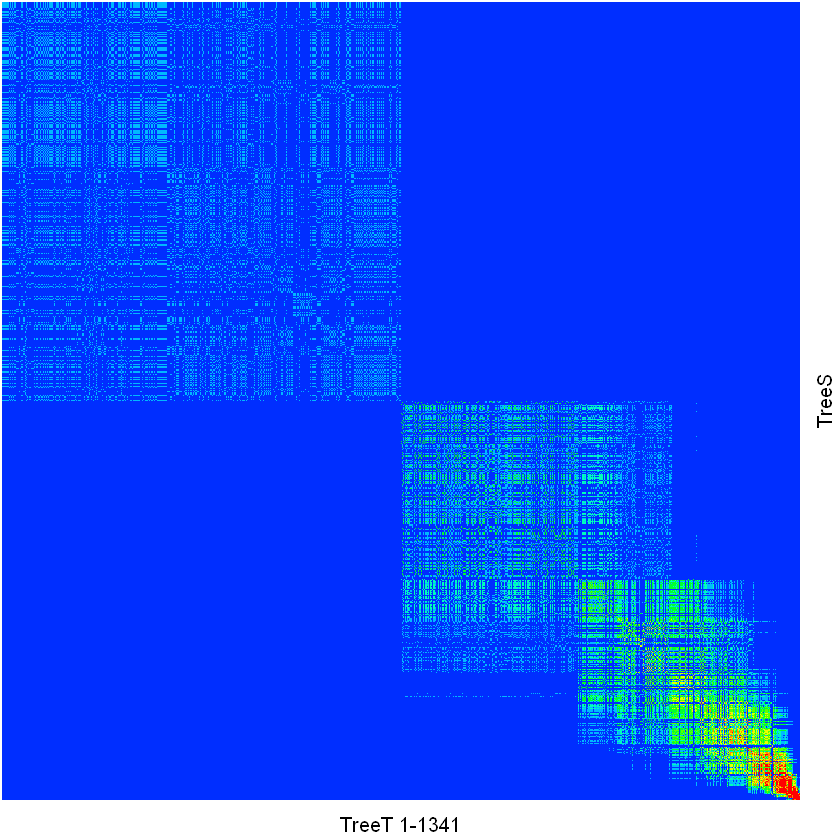

In [13]:
heatmap.2(score.matrix[1:1341,1:1341],
          dendrogram = "none", 
          labRow = FALSE, 
          labCol = FALSE, 
          Rowv=FALSE, 
          Colv=FALSE,
          trace='none',
          col = rev(rainbow(11)[1:8]), 
          key = FALSE, 
          keysize = 0.01, 
          margins = c(2,2), 
          breaks = 1.5^(0:8),
          xlab = "TreeT 1-1341", 
          ylab = "TreeS")

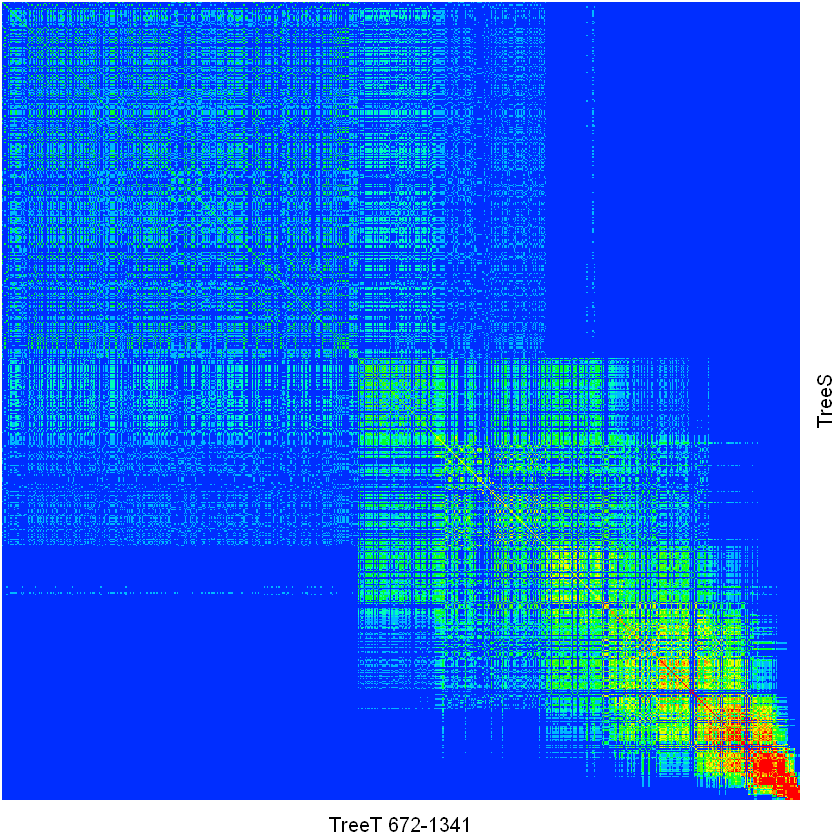

In [14]:
heatmap.2(score.matrix[672:1341,672:1341],
          dendrogram = "none", 
          labRow = FALSE, 
          labCol = FALSE, 
          Rowv=FALSE, 
          Colv=FALSE,
          trace='none',
          col = rev(rainbow(11)[1:8]), 
          key = FALSE, 
          keysize = 0.01, 
          margins = c(2,2), 
          breaks = 1.5^(0:8),
          xlab = "TreeT 672-1341", 
          ylab = "TreeS")

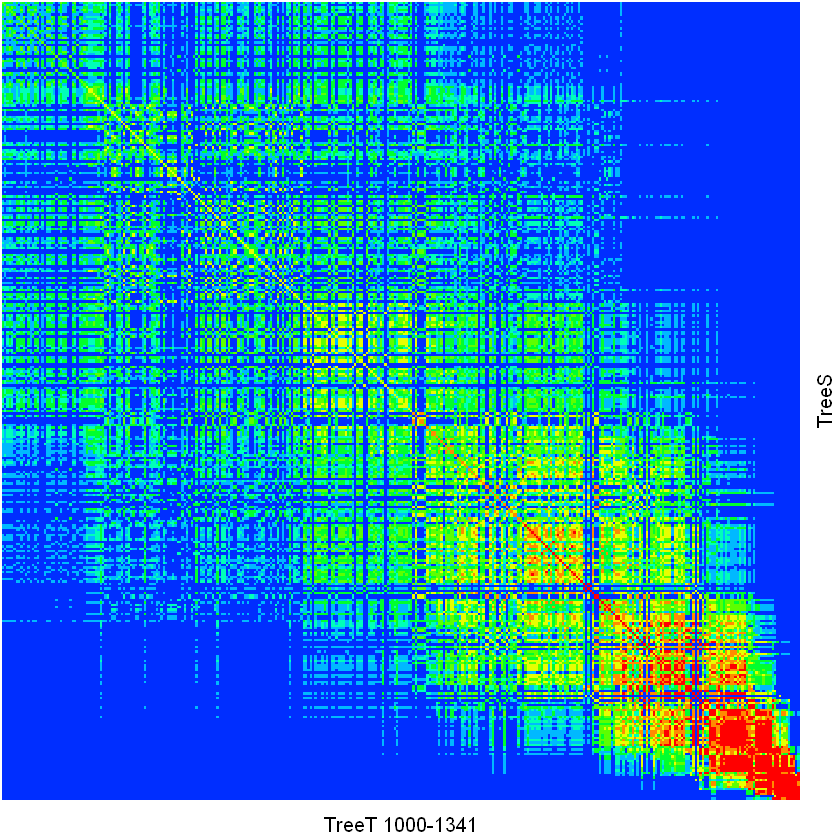

In [15]:
heatmap.2(score.matrix[1000:1341,1000:1341],
          dendrogram = "none", 
          labRow = FALSE, 
          labCol = FALSE, 
          Rowv=FALSE, 
          Colv=FALSE,
          trace='none',
          col = rev(rainbow(11)[1:8]), 
          key = FALSE, 
          keysize = 0.01, 
          margins = c(2,2), 
          breaks = 1.5^(0:8),
          xlab = "TreeT 1000-1341", 
          ylab = "TreeS")

## 2 Summarize the 1,000,000 trees

### read in the file

In [10]:
alignments <- ReadLocaTreeComparison(fname.alignments, 1000000)

### summary matching score

In [11]:
colnames(alignments)

[1] "id"          "Score"       "RootS"       "RootT"       "PruneS"     
[6] "PruneT"      "MatchS"      "MatchT"      "MatchLength"

In [12]:
length(alignments$id)

[1] 1000000

In [13]:
alignments$Score <- as.numeric(alignments$Score)
alignments$Score[1:10]

[1] 1342  268  268  206  206  114  114  109  109  108

In [14]:
matchLength.tab <- table(alignments$MatchLength)
matchLength.tab


     0      2      4      6      8     10     12     14     16     18     20 
987895   5503   1072   2227    773    378    566    444    209    102     72 
    22     24     26     28     30     32     34     36     38     40     42 
    78     76     84    100     54     38     60     28     16     18      8 
    44     46     48     50     52     54     56     58     60     62     64 
    10     14     10      8     10     12     16     14      8      4      2 
    66     68     70     72     76     78     84     86     90     92    100 
     2      8      6     10      4      4      6      4      4      2      2 
   104    106    108    114    116    118    124    170    178    182    194 
     2      2      4      2      8      4      2      2      2      2      2 
   224    230    400   1340 
     2      2      2      1 

In [15]:
matchLength.df <- as.data.frame(matchLength.tab)
colnames(matchLength.df) <- c("Score","Freq")
head(matchLength.df)

Score,Freq
0,987895
2,5503
4,1072
6,2227
8,773
10,378


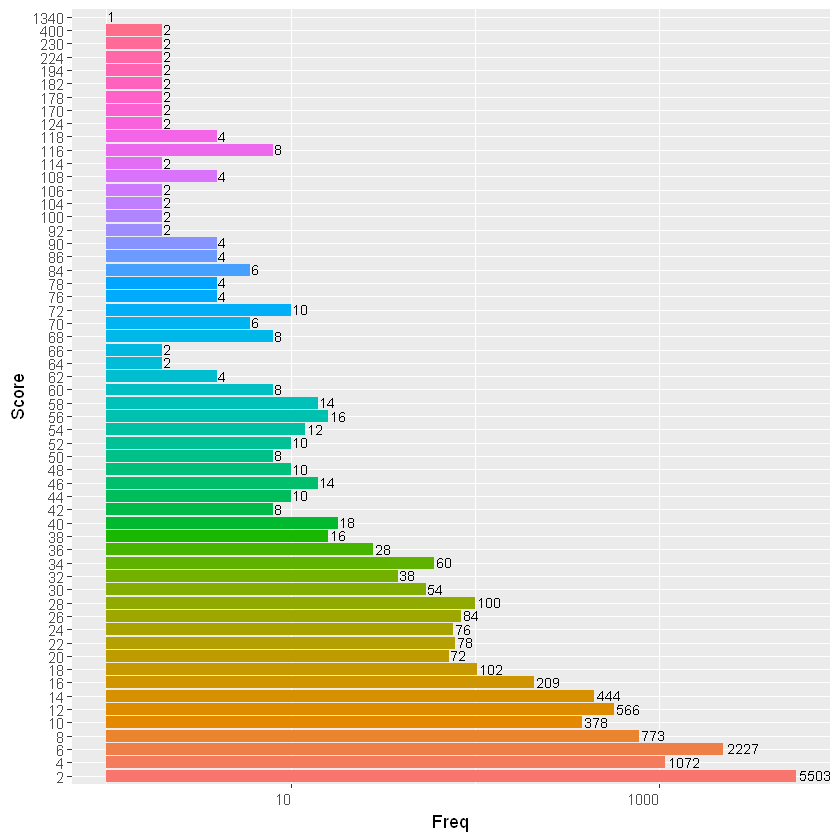

In [22]:
ggplot(matchLength.df[-(1:1),]) + 
    geom_bar(aes(x = Score, y = Freq, fill = Score),stat = "identity") + 
    scale_y_log10() + 
    theme(axis.text.x=element_text(angle = 0, vjust=0.5,hjust=1)) +
    geom_text(aes(x = Score, y = Freq, label = Freq), size=3, hjust = -0.1, vjust = 0.4) +
    theme(legend.position = "none") +
    coord_flip()

of the 1,000,000 sub-alignments, 98.79%  of them have a score of **0**

## 3 Calculate enrichment of paired nodes in aligned trees

### read in the reference Tree

In [16]:
referenceTree = ReadInputTree(fname.referenceTree)
head(referenceTree)
summary(referenceTree)

Lineage,Name,Class
0000000000,AINL,Neu
0000000001,Dead,Dea
0000000010,Dead,Dea
0000000011,ILshL,Str
0000000100,Dead,Dea
0000000101,RMEL,Neu


   Lineage              Name              Class          
 Length:671         Length:671         Length:671        
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

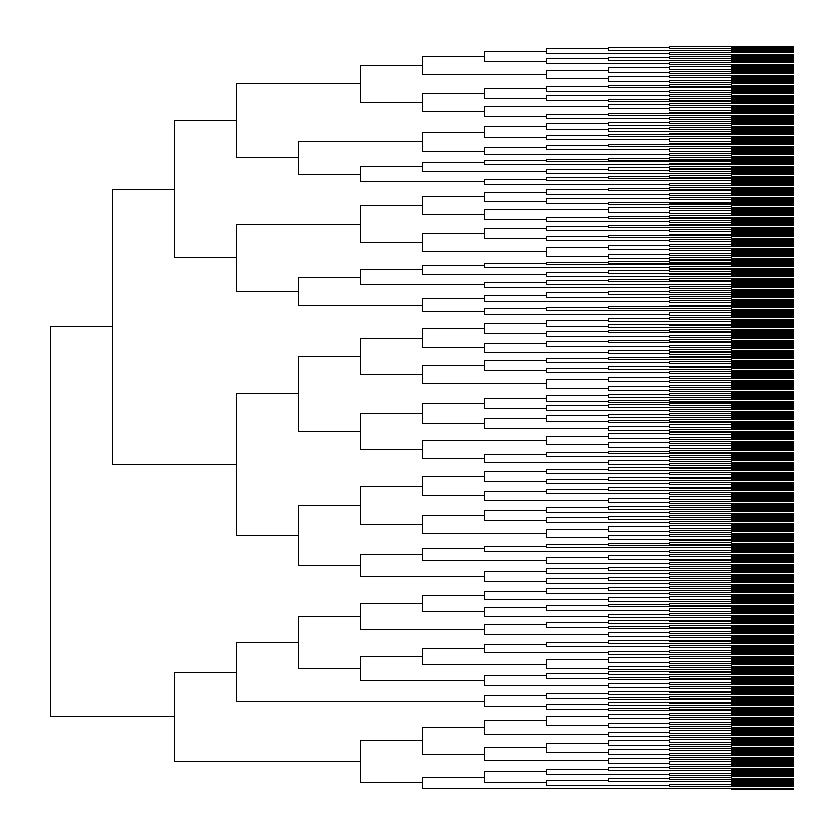

In [17]:
phyloTree <- BuildFullPhyloWithLineage(referenceTree$Lineage)
ggtree(phyloTree)

### set edge.length to 1

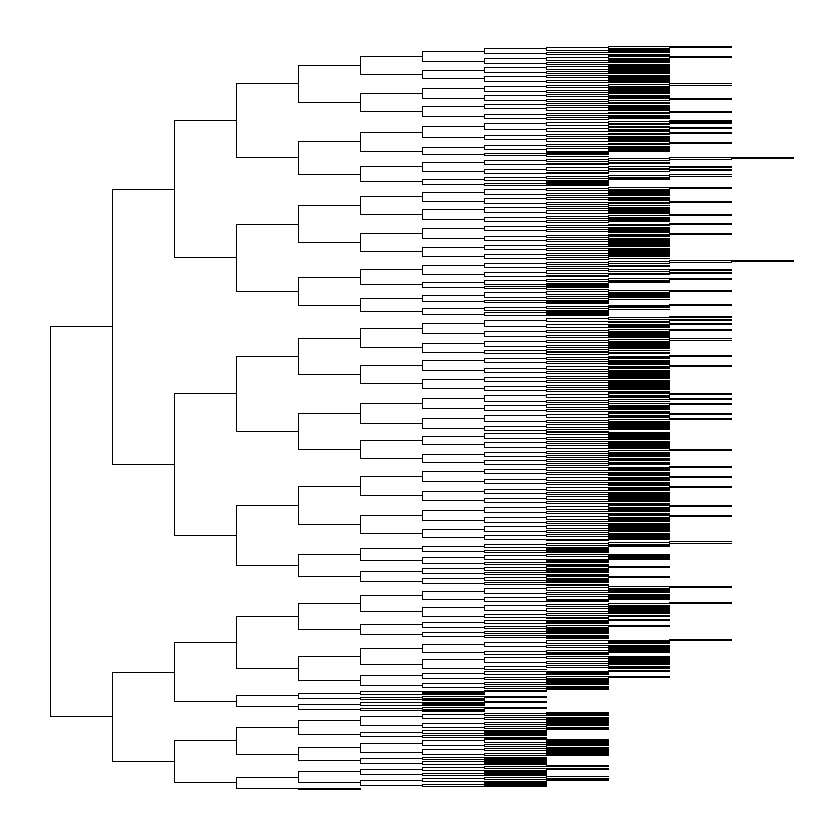

In [18]:
ftree <- phyloTree
ftree$edge.length <- rep(1, dim(phyloTree$edge)[1])
ggtree(ftree)

### read in the paired nodes

In [19]:
symmetryCells <- read.table(fname.symmetry, sep = ',', header = TRUE, as.is = TRUE, colClasses = "character")
head(symmetryCells)

Sister1,Sister2,Sister1_binary,Sister2_binary
P4a,P4p,11110,11111
Da,Dp,11100,11101
Ca,Cp,1100,1101
Eal,Ear,10100,10101
Epl,Epr,10110,10111
MSa,MSp,1000,1001


In [20]:
dim(symmetryCells)

[1] 42  4

### remove duplicates in paired nodes
symmetryCells.unique is all possible pairs. pairs (a, b) and (b, a) are different pairs.
totally 60 pairs.

In [21]:
symmetryCells.unique <- symmetryCells
symmetryCells.verse <- symmetryCells
colnames(symmetryCells.verse) <- colnames(symmetryCells)[c(2,1,4,3)]
symmetryCells.pairs <- rbind(symmetryCells, symmetryCells.verse)
symmetryCells.unique <- symmetryCells.pairs[!duplicated(paste(symmetryCells.pairs$Sister1_binary,symmetryCells.pairs$Sister2_binary, ' ')),]
dim(symmetryCells.unique)

[1] 60  4

### find pairs in in aligned trees

#### use only alignments with at lease one pair

In [22]:
alignments.1more <- alignments[alignments$MatchLength >0,]
dim(alignments.1more)

[1] 12105     9

In [23]:
sym1 <- symmetryCells.unique$Sister1_binary
sym2 <- symmetryCells.unique$Sister2_binary
sym.pairs <- paste(sym1, sym2)

In [24]:
for (i in 1:dim(alignments.1more)[1]){
  MatchS <- c(alignments.1more$RootS[[i]],alignments.1more$MatchS[[i]])
  MatchT <- c(alignments.1more$RootT[[i]],alignments.1more$MatchT[[i]])
  matchPairs <- data.frame(MatchS, MatchT,stringsAsFactors=FALSE)
  matchLength <- length(MatchS)
  matchPairs.asChr <- paste(MatchS, MatchT)
  symPairs <- matchPairs[matchPairs.asChr %in% sym.pairs,]
  symPairsL <- dim(symPairs)[1]
  alignments.1more[i,"matchLength"] <- matchLength
  alignments.1more[i,"symPairsL"] <- symPairsL
  if (symPairsL != 0)
    alignments.1more[i,"symPairs"][[1]] <- list(symPairs)
  
}

In [25]:
sum(alignments.1more$symPairsL)

[1] 54

In [26]:
alignments.withPair <- alignments.1more[!unlist(lapply(alignments.1more$symPairs, is.null)),]

In [27]:
subset(alignments.withPair, select = -c(PruneS, PruneT,MatchS, MatchT))

,id,Score,RootS,RootT,MatchLength,matchLength,symPairsL,symPairs
2,2,268,00,01,400,401,2,"000111, 001101, 011000, 010000"
3,3,268,01,00,400,401,2,"010000, 011000, 001101, 000111"
4,4,206,010,011,224,225,3,"0101 , 01001 , 010001, 0111 , 01101 , 011001"
5,5,206,011,010,224,225,3,"0111 , 01101 , 011001, 0101 , 01001 , 010001"
8,8,109,001,000,178,179,1,"0010001, 0001001"
9,9,109,000,001,178,179,1,"0001001, 0010001"
18,18,67,1001,1000,84,85,1,"1001, 1000"
19,19,67,1000,1001,84,85,1,"1000, 1001"
48,48,43,00000,00011,58,59,1,"00000101, 00011001"
50,50,43,00011,00000,58,59,1,"00011001, 00000101"


In [28]:
dim(alignments.withPair)

[1] 44 12

In [29]:
symPairs.inAlignments <- do.call(rbind, alignments.withPair$symPairs)
dim(symPairs.inAlignments)

[1] 54  2

In [30]:
dim(unique(symPairs.inAlignments))

[1] 54  2

In [31]:
head(symPairs.inAlignments)

,MatchS,MatchT
23,000111,011000
29,001101,010000
16,010000,001101
24,011000,000111
3,0101,0111
5,01001,01101


**conclusion: the symPairs are all unique in these alignments**

### symPairs not identified in alignments

In [32]:
symmetryCells.notInAlignments <- symmetryCells.unique[!(sym.pairs %in% paste(symPairs.inAlignments$MatchS, symPairs.inAlignments$MatchT)),]
symmetryCells.notInAlignments

,Sister1,Sister2,Sister1_binary,Sister2_binary
1,P4a,P4p,11110,11111
7,MSaaaaaar,Msaaaaaal,1000000001,1000000000
19,ABarpaaaaar,ABarpaaaaal,0011000001,0011000000
43,P4p,P4a,11111,11110
49,Msaaaaaal,MSaaaaaar,1000000000,1000000001
61,ABarpaaaaal,ABarpaaaaar,0011000000,0011000001


Reason of these symPairs Not identified: they are the end points with no branches.

### Not sure how to calculate enrichment.

### Find ID of sym.pairs in alignments.1more or new.alignments

In [82]:
fname.newAlignments <- "C:/Users/ATPs/OneDrive/Lab/YangLab/YangLabSharedProject_Xiaolong/Celegans/Lineages/20180130funAlignmentMinus1Matrix100000.txt"
new.alignments <- ReadLocaTreeComparison(fname.newAlignments)

In [83]:
fname.newAlignments100 <- "C:/Users/ATPs/OneDrive/Lab/YangLab/YangLabSharedProject_Xiaolong/Celegans/Lineages/20180130funAlignmentMinus100Matrix100000.txt"
new.alignments100 <- ReadLocaTreeComparison(fname.newAlignments100)

In [84]:
dim(new.alignments)

[1] 100000      9

In [85]:
dim(new.alignments100)

[1] 100000      9

In [86]:
tail(new.alignments,5)

,id,Score,RootS,RootT,PruneS,PruneT,MatchS,MatchT,MatchLength
99996,99996,0,0110001000,001000010,,,,,0
99997,99997,0,0110001000,010100101,,,,,0
99998,99998,0,0110001000,001000100,,,,,0
99999,99999,0,0110001000,001000101,,,,,0
100000,100000,0,0110001000,100001011,,,,,0


In [87]:
head(sym.pairs)
length(sym.pairs)

[1] "11110 11111" "11100 11101" "1100 1101"   "10100 10101" "10110 10111"
[6] "1000 1001"

[1] 60

In [88]:
df.symPair <- data.frame(SymPair = sym.pairs)

In [89]:
paste(alignments.1more[100,"MatchS"][[1]],alignments.1more[100,"MatchT"][[1]],sep = " ")

[1] "000010 00010"            "000011 00011"           
 [3] "0000100 000100"          "0000101 000101"         
 [5] "0000110 000110"          "0000111 000111"         
 [7] "00001000 0001001"        "00001001 0001000"       
 [9] "00001010 0001011"        "00001011 0001010"       
[11] "00001100 0001100"        "00001101 0001101"       
[13] "00001110 0001111"        "00001111 0001110"       
[15] "000010010 00010000"      "000010011 00010001"     
[17] "000010100 00010110"      "000010101 00010111"     
[19] "000010110 00010101"      "000010111 00010100"     
[21] "000011000 00011001"      "000011001 00011000"     
[23] "000011010 00011011"      "000011011 00011010"     
[25] "000011100 00011111"      "000011101 00011110"     
[27] "000011110 00011101"      "000011111 00011100"     
[29] "0000100100 000100000"    "0000100101 000100001"   
[31] "0000100110 000100011"    "0000100111 000100010"   
[33] "0000101010 000101110"    "0000101011 000101111"   
[35] "0000101110 000101000"    "0000101111 000101001"   
[37] "0000110010 000110001"    "0000110011 000110000"   
[39] "0000111000 000111110"    "0000111001 000111111"   
[41] "0000111010 000111100"    "0000111011 000111101"   
[43] "0000111100 000111011"    "0000111101 000111010"   
[45] "00001001100 0001000111"  "00001001101 0001000110" 
[47] "00001010100 0001011100"  "00001010101 0001011101" 
[49] "0000101100 0001010101"   "0000101101 0001010100"  
[51] "0000110110 0001101000"   "0000110111 0001101001"  
[53] "00001110100 0001111000"  "00001110101 0001111001" 
[55] "0000111110 0001110000"   "0000111111 0001110001"  
[57] "00001011000 00010101011" "00001011001 00010101010"
[59] "0000110100 00011011100"  "0000110101 00011011101" 
[61] "00001111000 00011101110" "00001111001 00011101111"

In [90]:
alignments.1more.temp <- alignments[alignments$Score > 0,]
alignments.1more.temp$matchPairs <- apply(alignments.1more.temp, 1, function(x){
        paste(c(x["RootS"],x["MatchS"][[1]]),c(x["RootT"],x["MatchT"][[1]]), sep = " ")
    })
new.alignments.temp <- new.alignments[new.alignments$Score > 0,]
new.alignments.temp$matchPairs <- apply(new.alignments.temp, 1, function(x){
        paste(c(x["RootS"],x["MatchS"][[1]]),c(x["RootT"],x["MatchT"][[1]]), sep = " ")
    })

In [91]:
new.alignments100.temp <- new.alignments100[new.alignments100$Score > 0,]
new.alignments100.temp$matchPairs <- apply(new.alignments100.temp, 1, function(x){
        paste(c(x["RootS"],x["MatchS"][[1]]),c(x["RootT"],x["MatchT"][[1]]), sep = " ")
    })

In [92]:
F.expandListInDF <- function(df){
    id <- rep(df$id, times = rapply(df$matchPairs, length))
    matchPairs <- unlist(df$matchPairs)
    return(data.frame(id = id, matchPairs = matchPairs))
}

In [93]:
df.matchPairs.temp <- F.expandListInDF(alignments.1more.temp)

In [94]:
df.matchPairs.new <- F.expandListInDF(new.alignments.temp)
df.matchPairs100.new <- F.expandListInDF(new.alignments100.temp)

In [95]:
head(df.matchPairs.temp)

id,matchPairs
1,Root Root
1,0 0
1,1 1
1,00 00
1,01 01
1,10 10


In [96]:
match(sym.pairs, df.matchPairs.temp$matchPairs)

[1] 152983  17082   8327  33813  33768   4707 128854   2371   2373   1766
[11]   2377   2146   2148   1758   2152  18796   1370  75611 136950  14914
[21]   8800   8798  13948  21924   3000  73499   1364  14732  41923   7938
[31]  14165   8741   3187   8739  11979  11980  14765  42309   7824  17258
[41]  40262  68372 152984  17101   8282  33795  33750   4622 128838  18813
[51]  75623 136918  21907  73526  11948  11950  14945  17231  40269  68423

In [97]:
match(sym.pairs, df.matchPairs.new$matchPairs)

[1] 142946  14986   7103  28828  28783   4055 117221   2335   2337   1748
[11]   2341   2110   2112   1740   2116  16394   1370  67865 126063  13779
[21]   9628   9626  15084  20119   3072  65591   1364  13566  41784   7373
[31]  15239   9569   3255   9567  11345  11346  14302  42022   7318  16539
[41]  36100  60233 142947  15005   7058  28810  28756   3970 117202  16411
[51]  67877 126029  20102  65618  11314  11316  14327  16485  36107  60290

In [98]:
match(sym.pairs, df.matchPairs100.new$matchPairs)

[1] 134239  12699   6251  24212  24068   3517 107148   2191   2193   1686
[11]   2197   1986   1988   1678   1992  13936   1370  60480 116498   2730
[21]   9156   9154     NA  18522   2724  58038   1364   2877  35233   6977
[31]     NA   9113   2873   9111   9289   9290   7306  35403   6930  16307
[41]  30310  52410 134240  12718   6210  24149  23924   3442 107125  13953
[51]  60492 116462  18507  58068   9258   9260   7349  16259  30317  52482

In [99]:
df.symPair$IDnormal <- match(sym.pairs, df.matchPairs.temp$matchPairs)
df.symPair$IDminus <- match(sym.pairs, df.matchPairs.new$matchPairs)
df.symPair$IDminus100 <- match(sym.pairs, df.matchPairs100.new$matchPairs)

Warning message:
"Ignoring unknown parameters: slop"Warning message:
"Removed 2 rows containing missing values (geom_point)."

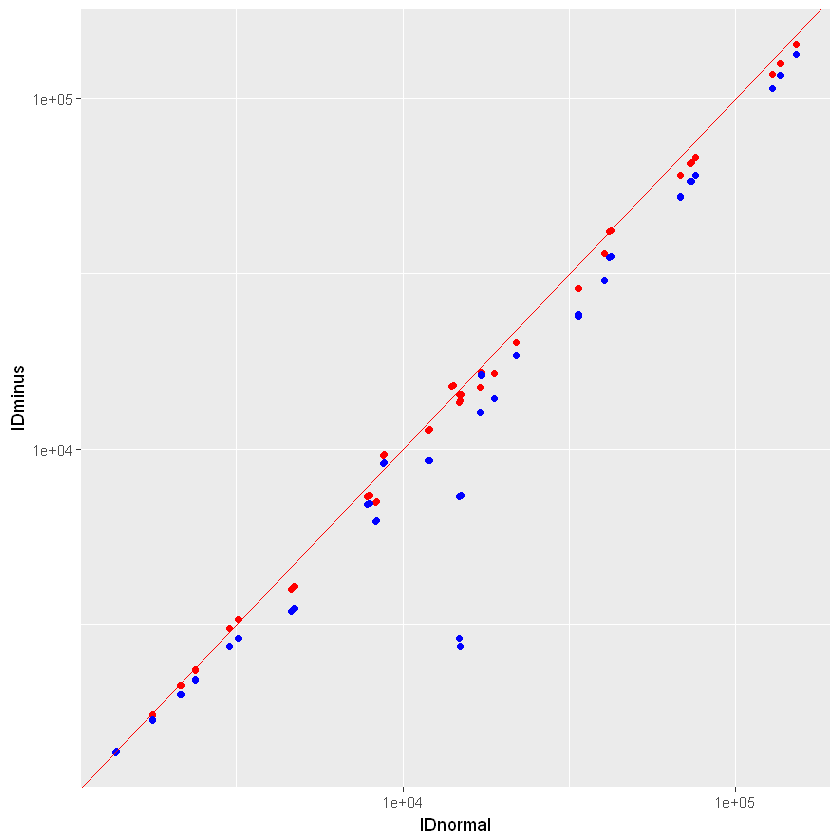

In [102]:
ggplot(df.symPair, aes(x = IDnormal)) + geom_point(aes(y = IDminus),color = "red") + 
    geom_point(aes(y = IDminus100),color = "blue") + 
    geom_abline(slop = 1,color = "red") +
    scale_x_log10() + scale_y_log10()

## 4 Combine aligned tree with EPIC data

### set up folder and files

In [40]:
folder.epic = "X:\\Insects\\C_elegans\\201709Cell_lineage\\EPIC"
fnames.epic <- list.files(path = folder.epic,full.names = TRUE)

### read in files to list, calculate average gene expression for each cell

In [41]:
GetAverageBlotFromFile <- function(filename, minThres = 0){
    ## given a filename of csv of gene expression of EPIC
    ## return a data.frame with cell, and gene expression (column name is the filename)
    ### read in the csv file
    ks.df <- read.csv(filename)
    ### convert the value less than minThres in blot column to 0
    ks.df$blot <- unlist(lapply(ks.df$blot, function(x){if(x>=minThres){x}else{0}}))
    ### calculate mean gene expression for a cell
    ks.df.cell <- aggregate(ks.df$blot, by = list(cell = ks.df$cell), FUN = mean)
    ### change the colname of x to filename
    colnames(ks.df.cell) <- c("cell",filename)
    return(ks.df.cell)
}

In [42]:
ks.tempdf <- GetAverageBlotFromFile(fnames.epic[3],0)

In [43]:
head(ks.tempdf)

cell,X:\Insects\C_elegans\201709Cell_lineage\EPIC/CD030906_dyf7red.csv
ABa,0.00000
ABal,68.82353
ABala,35.50000
ABalaa,65.07692
ABalaaa,19.19355
ABalaaaa,41.10526


In [44]:
colnames(ks.tempdf)

[1] "cell"                                                                 
[2] "X:\\Insects\\C_elegans\\201709Cell_lineage\\EPIC/CD030906_dyf7red.csv"

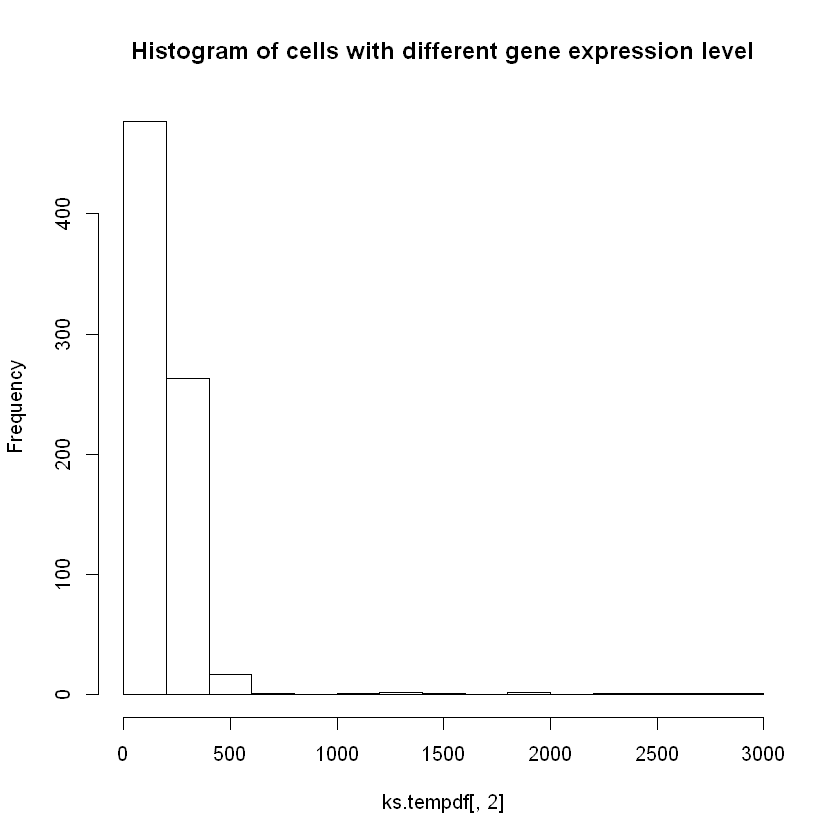

In [45]:
hist(ks.tempdf[,2], main = "Histogram of cells with different gene expression level")

In [46]:
gene.ls  <- list()
for (f in fnames.epic){
    gene.ls[[f]] <- GetAverageBlotFromFile(f,0)
}
length(gene.ls)

[1] 260

### Get cell.names to build the expression data.frame

In [47]:
cell.names <- unique(unlist(lapply(gene.ls, function(x)x$cell)))

In [48]:
length(cell.names)

[1] 2769

In [49]:
for (i in gene.ls){if (length(unique(i$cell))>1300)print(c(length(unique(i$cell)),colnames(i)[2]))}

[1] "2434"                                                                        
[2] "X:\\Insects\\C_elegans\\201709Cell_lineage\\EPIC/CD20090319EGL-5_AF16_L1.csv"


all epic files have less than 1300 cells, but "CD20090319EGL-5_AF16_L1.csv" contains 2434 cells.

In [50]:
cell.table <- table(unlist(lapply(gene.ls, function(x)x$cell)))

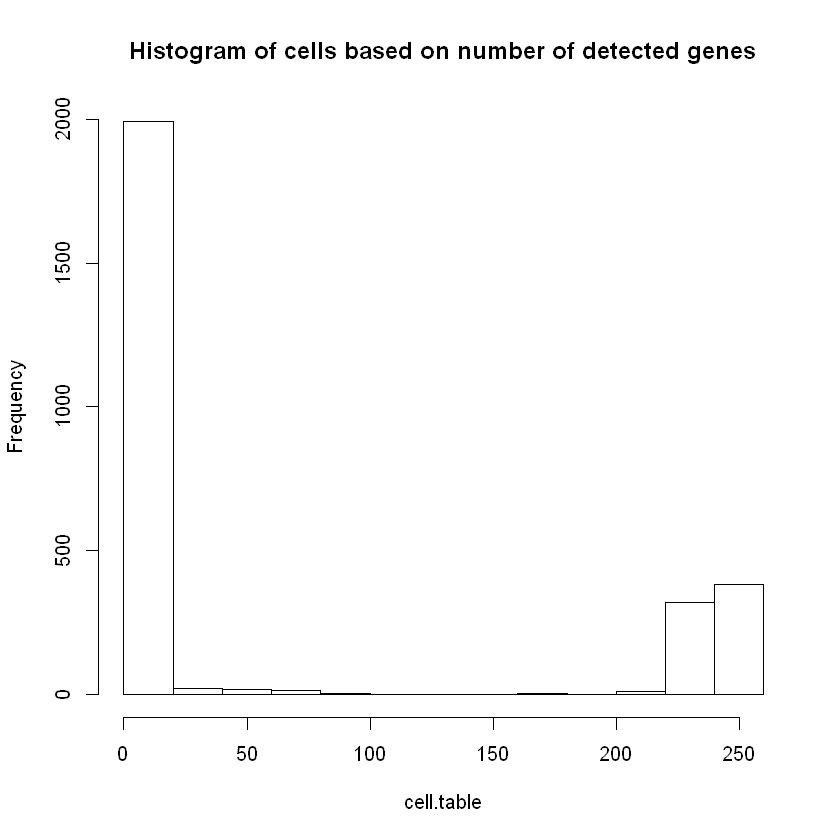

In [51]:
hist(cell.table, main = "Histogram of cells based on number of detected genes")

In [52]:
cell.namesMorethan10 <- names(cell.table[cell.table>=10])

In [53]:
length(cell.namesMorethan10)

[1] 814

### convert list to data.frame

In [54]:
cell.df.init <- data.frame(cell = cell.namesMorethan10)

In [55]:
head(cell.df.init)

cell
ABa
ABal
ABala
ABalaa
ABalaaa
ABalaaaa


In [56]:
cell.df <- Reduce(function(x,y){merge(x, y, all.x = TRUE, by = "cell")},x = gene.ls, init = cell.df.init)

In [57]:
dim(cell.df)

[1] 814 261

### change column names from filepath to filename
"X:\Insects\C_elegans\201709Cell_lineage\EPIC/CD011505_end1red_bright.csv" to "011505_end1red_bright"

In [58]:
colnames(cell.df) <- c("cell", unlist(lapply(strsplit(colnames(cell.df)[-1], split="/|\\.|(CD)"), function(x)x[3])))

In [59]:
head(cell.df)

cell,011505_end1red_bright,011605_5a_bright,030906_dyf7red,20060506_dyf7pJIM20,20060516_mi57,20060516_mir_57,20060627_cnd1_4-2,20060628_cnd1_4-2,20060629_pha4_b2,...,20090812_C05D10_1b_3_L1,20090813_nhr-49b_5_L1,20091023_dpy-31_3_L2,20091113_mel-28_2_L1,20091116_F17C11_5_12_L1,20091117_tag-185_b_6_L1,20091118_T22C8_3_11_L1,20091119_lir-2_OP175_L1,20091119_unc-130_9E1_4_L1,20091127_pgp-2_5_L2
AB,NA,12.555556,NA,4.933333,NA,NA,NA,0.000000,NA,...,NA,NA,NA,NA,NA,NA,0.00000,NA,NA,NA
ABa,29.88889,45.533333,0.00000,0.000000,0.0000000,NA,0.0000,271.692308,21.57143,...,0.00000,16.571429,0.00000,0.00000,0.00000,2.4000000,114.62500,6.714286,0.0000000,47.857143
ABal,13.36842,30.642857,68.82353,34.588235,1.6666667,1.7142857,41.3125,214.142857,0.00000,...,40.30000,31.727273,13.27273,41.55556,11.12500,37.2222222,19.22222,32.200000,0.0000000,31.333333
ABala,18.00000,9.411765,35.50000,0.000000,1.0000000,0.5294118,102.0588,159.941176,50.05556,...,11.63636,0.000000,0.00000,10.58333,28.72727,0.2727273,0.00000,38.307692,0.0000000,0.000000
ABalaa,20.59259,17.259259,65.07692,11.500000,0.8518519,0.9583333,163.0000,8.730769,106.68000,...,0.00000,5.235294,41.82353,92.05882,19.27778,9.0000000,26.94118,149.722222,0.0000000,6.750000
ABalaaa,25.93939,5.800000,19.19355,14.424242,2.8965517,0.8571429,496.0000,221.642857,41.10345,...,32.00000,16.956522,33.30000,111.00000,0.00000,61.0526316,102.00000,496.173913,0.4444444,9.210526


In [60]:
write.table(cell.df,file = "20171207EPIC_cell_geneExpression.csv",sep = "\t", row.names = FALSE)

### For different genes, keep only representative one listed in EPIC 

In [61]:
ks.epic.df <- read.csv(fname.epic,sep = "\t")

In [62]:
head(ks.epic.df)

expression.tree,gene,total.series,series.shown,movie
tree thumb,alr-1 R08B4.2,2,20081016_alr-1_10A2_3_L1,gif
tree thumb,ama-1 F36A4.7,1,20080412_ama-1_3A3_5,gif
tree thumb,B0310.2 B0310.2,4,20080905_B0310_2_13_L1,gif
tree thumb,B0336.3 B0336.3,4,20090505_B0336_3_13_L1,gif
tree thumb,C05D10.1 C05D10.1,2,20090812_C05D10_1b_3_L1,gif
tree thumb,C08B11.3 C08B11.3,2,20071013_C08B11_3_6,gif


In [63]:
gene.use <- intersect(colnames(cell.df), ks.epic.df$series.shown)

In [64]:
cell.df.use <- cell.df[,c("cell", gene.use)]

In [65]:
dim(cell.df.use)

[1] 814 120

In [66]:
head(cell.df.use)

cell,011605_5a_bright,030906_dyf7red,20060516_mi57,20060627_cnd1_4-2,20060629_pha4_b2,20060719_lin1_10,20060915_mir61_e16,20070110_Ges1-4,20070111_hlh1_4,...,20090804_tps-2_2_L1,20090806_F58D2_1_2_L1,20090810_hmg-11_7_L1,20090812_C05D10_1b_3_L1,20090813_nhr-49b_5_L1,20091113_mel-28_2_L1,20091116_F17C11_5_12_L1,20091117_tag-185_b_6_L1,20091119_lir-2_OP175_L1,20091127_pgp-2_5_L2
AB,12.555556,NA,NA,NA,NA,44.000000,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ABa,45.533333,0.00000,0.0000000,0.0000,21.57143,15.857143,93.33333,0.00000,0.00000,...,208.00000,0.000000,57.250000,0.00000,16.571429,0.00000,0.00000,2.4000000,6.714286,47.857143
ABal,30.642857,68.82353,1.6666667,41.3125,0.00000,5.866667,23.25000,13.06667,51.82353,...,20.60000,14.800000,7.888889,40.30000,31.727273,41.55556,11.12500,37.2222222,32.200000,31.333333
ABala,9.411765,35.50000,1.0000000,102.0588,50.05556,38.684211,90.15789,83.00000,28.17647,...,0.00000,4.769231,80.909091,11.63636,0.000000,10.58333,28.72727,0.2727273,38.307692,0.000000
ABalaa,17.259259,65.07692,0.8518519,163.0000,106.68000,23.222222,85.22222,0.00000,21.08000,...,88.87500,4.166667,24.062500,0.00000,5.235294,92.05882,19.27778,9.0000000,149.722222,6.750000
ABalaaa,5.800000,19.19355,2.8965517,496.0000,41.10345,109.500000,104.93548,54.75000,39.76667,...,33.21053,70.681818,4207.800000,32.00000,16.956522,111.00000,0.00000,61.0526316,496.173913,9.210526


### convert cell code to binary

In [67]:
  the_prefix <- c(
    "AB",
    "Ab",
    "B",
    "C",
    "D",
    "E",
    "F",
    "G1",
    "G2",
    "H1L",
    "H1R",
    "H2L",
    "H2R",
    "K",
    "M",
    "MS",
    "P0",
    "P1",
    "P10",
    "P11",
    "P12",
    "P2",
    "P3",
    "P4",
    "P5",
    "P6",
    "P7",
    "P8",
    "P9",
    "QL",
    "QR",
    "TL",
    "TR",
    "U",
    "V1L",
    "V1R",
    "V2L",
    "V2R",
    "V3L",
    "V3R",
    "V4L",
    "V4R",
    "V5L",
    "V5R",
    "V6L",
    "V6R",
    "W",
    "Y",
    "Z",
    "Z1",
    "Z4",
    "Z2",
    "Z3",
    "EMS"
  )
  
  #########
 
   the_true_prefix <- c(
    "Za",
    "Za",
    "Zaprppppapa",
    "Zppa",
    "Zpppa",
    "Zpap",
    "Zaplppppapp",
    "Zaprpaaaapa",
    "Zaplapaapa",
    "Zaplaaappp",
    "Zaarpapppp",
    "Zaarppaaap",
    "Zaarpppaap",
    "Zaplpapppaa",
    "Zpaaapaapp",
    "Zpaa",
    "Z",
    "Zp",#P1(CXL:"Zaplapaapp"->YM:"Zp")
    "Zaprapapap", #P10
    "Zaplapappa", #P11
    "Zaprapappa", #P12
    "Zpp",#P2(CXL:"Zaprapaapp"->YM:"Zpp")
    "Zppp", #P3(CXL: "Zaplappaaa"->YM:"Zppp")
    "Zpppp",#P4(CXL:"Zaprappaaa"->YM:"Zpppp")
    "Zaplappaap",
    "Zaprappaap",
    "Zaplappapp",
    "Zaprappapp",
    "Zaplapapap",
    "Zaplapapaaa",
    "Zaprapapaaa",
    "Zaplappppp",
    "Zaprappppp",
    "Zaplppppapa",
    "Zaarppapaa",
    "Zaarppppaa",
    "Zaarppapap",
    "Zaarppppap",
    "Zaplappapa",
    "Zaprappapa",
    "Zaarppappa",
    "Zaarpppppa",
    "Zaplapapaap",
    "Zaprapapaap",
    "Zaarppappp",
    "Zaarpppppp",
    "Zaprapaapa",
    "Zaprpppaaaa",
    "Z",
    "Zpaapppaap",
    "Zpaaappaap",
    "Zppppp",
    "Zppppa",
    "Zpa"
  )
the_prefix.df <- data.frame(Prefix = the_prefix, TruePrefix = the_true_prefix, stringsAsFactors = FALSE)

In [68]:
head(the_prefix.df)

Prefix,TruePrefix
AB,Za
Ab,Za
B,Zaprppppapa
C,Zppa
D,Zpppa
E,Zpap


In [69]:
the_prefix.use <- table(regmatches(cell.namesMorethan10, regexpr("[A-Z0-9]+", cell.namesMorethan10)))
the_prefix.use


 AB   C   D   E EMS  MS  P1  P2  P3  P4  Z2  Z3 
549  63  31  31   1 133   1   1   1   1   1   1 

In [70]:
table(regmatches(cell.names, regexpr("[A-Z0-9]+", cell.names)))


  AB    C    D    E  EMS   MS    N   P0   P1   P2   P3   P4   Z2   Z3 
2099  123   67   75    1  395    2    1    1    1    1    1    1    1 

In [71]:
the_prefix.df.use <- the_prefix.df[the_prefix.df$Prefix %in% names(the_prefix.use),]
the_prefix.df.use

,Prefix,TruePrefix
1,AB,Za
4,C,Zppa
5,D,Zpppa
6,E,Zpap
16,MS,Zpaa
18,P1,Zp
22,P2,Zpp
23,P3,Zppp
24,P4,Zpppp
52,Z2,Zppppp


In [72]:
the_prefix.vec.use = the_prefix.df.use$TruePrefix
names(the_prefix.vec.use) <- the_prefix.df.use$Prefix
the_prefix.vec.use

AB        C        D        E       MS       P1       P2       P3 
    "Za"   "Zppa"  "Zpppa"   "Zpap"   "Zpaa"     "Zp"    "Zpp"   "Zppp" 
      P4       Z2       Z3      EMS 
 "Zpppp" "Zppppp" "Zppppa"    "Zpa"

In [73]:
ref.binary <- setNames(c("","0","0","0","1","1","1"),c("Z","a","l","d","p","r","v"))
ref.binary

Z   a   l   d   p   r   v 
 "" "0" "0" "0" "1" "1" "1"

In [74]:
ConvertCellNameToBinary <- function(name){
    #name is like ABalaaa, convert it to binary code in 01
    name.prefix  <- regmatches(name, regexpr("[A-Z0-9]+", name))
    name.postfix <- regmatches(name, regexpr("[aldprv]+", name))
    name.converted <- paste0(the_prefix.vec.use[name.prefix],name.postfix)
    name.vector <- strsplit(name.converted,"")[[1]]
    name.vectorBin <- ref.binary[name.vector]
    name.bin = paste0(name.vectorBin,collapse = "")
    return(name.bin)
}

In [75]:
ConvertCellNameToBinary("ABa")

[1] "00"

In [76]:
cell.df.use$Bin <- unlist(lapply(cell.df.use$cell, ConvertCellNameToBinary))

In [77]:
rownames(cell.df.use) <- cell.df.use$Bin

In [78]:
head(cell.df.use)

,cell,011605_5a_bright,030906_dyf7red,20060516_mi57,20060627_cnd1_4-2,20060629_pha4_b2,20060719_lin1_10,20060915_mir61_e16,20070110_Ges1-4,20070111_hlh1_4,...,20090806_F58D2_1_2_L1,20090810_hmg-11_7_L1,20090812_C05D10_1b_3_L1,20090813_nhr-49b_5_L1,20091113_mel-28_2_L1,20091116_F17C11_5_12_L1,20091117_tag-185_b_6_L1,20091119_lir-2_OP175_L1,20091127_pgp-2_5_L2,Bin
0,AB,12.555556,NA,NA,NA,NA,44.000000,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,0
00,ABa,45.533333,0.00000,0.0000000,0.0000,21.57143,15.857143,93.33333,0.00000,0.00000,...,0.000000,57.250000,0.00000,16.571429,0.00000,0.00000,2.4000000,6.714286,47.857143,00
000,ABal,30.642857,68.82353,1.6666667,41.3125,0.00000,5.866667,23.25000,13.06667,51.82353,...,14.800000,7.888889,40.30000,31.727273,41.55556,11.12500,37.2222222,32.200000,31.333333,000
0000,ABala,9.411765,35.50000,1.0000000,102.0588,50.05556,38.684211,90.15789,83.00000,28.17647,...,4.769231,80.909091,11.63636,0.000000,10.58333,28.72727,0.2727273,38.307692,0.000000,0000
00000,ABalaa,17.259259,65.07692,0.8518519,163.0000,106.68000,23.222222,85.22222,0.00000,21.08000,...,4.166667,24.062500,0.00000,5.235294,92.05882,19.27778,9.0000000,149.722222,6.750000,00000
000000,ABalaaa,5.800000,19.19355,2.8965517,496.0000,41.10345,109.500000,104.93548,54.75000,39.76667,...,70.681818,4207.800000,32.00000,16.956522,111.00000,0.00000,61.0526316,496.173913,9.210526,000000


### prepare the data.frame for tree-alignments

In [79]:
cell.df.exp <- cell.df.use[ ,-c(1,length(cell.df.use))]
head(cell.df.exp)

,011605_5a_bright,030906_dyf7red,20060516_mi57,20060627_cnd1_4-2,20060629_pha4_b2,20060719_lin1_10,20060915_mir61_e16,20070110_Ges1-4,20070111_hlh1_4,20070308_eft3,...,20090804_tps-2_2_L1,20090806_F58D2_1_2_L1,20090810_hmg-11_7_L1,20090812_C05D10_1b_3_L1,20090813_nhr-49b_5_L1,20091113_mel-28_2_L1,20091116_F17C11_5_12_L1,20091117_tag-185_b_6_L1,20091119_lir-2_OP175_L1,20091127_pgp-2_5_L2
0,12.555556,NA,NA,NA,NA,44.000000,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
00,45.533333,0.00000,0.0000000,0.0000,21.57143,15.857143,93.33333,0.00000,0.00000,0.00000,...,208.00000,0.000000,57.250000,0.00000,16.571429,0.00000,0.00000,2.4000000,6.714286,47.857143
000,30.642857,68.82353,1.6666667,41.3125,0.00000,5.866667,23.25000,13.06667,51.82353,16.47059,...,20.60000,14.800000,7.888889,40.30000,31.727273,41.55556,11.12500,37.2222222,32.200000,31.333333
0000,9.411765,35.50000,1.0000000,102.0588,50.05556,38.684211,90.15789,83.00000,28.17647,68.95238,...,0.00000,4.769231,80.909091,11.63636,0.000000,10.58333,28.72727,0.2727273,38.307692,0.000000
00000,17.259259,65.07692,0.8518519,163.0000,106.68000,23.222222,85.22222,0.00000,21.08000,24.42308,...,88.87500,4.166667,24.062500,0.00000,5.235294,92.05882,19.27778,9.0000000,149.722222,6.750000
000000,5.800000,19.19355,2.8965517,496.0000,41.10345,109.500000,104.93548,54.75000,39.76667,85.74194,...,33.21053,70.681818,4207.800000,32.00000,16.956522,111.00000,0.00000,61.0526316,496.173913,9.210526


In [80]:
cell.df.expLog2 <- log2(cell.df.exp+1)
head(cell.df.expLog2)

,011605_5a_bright,030906_dyf7red,20060516_mi57,20060627_cnd1_4-2,20060629_pha4_b2,20060719_lin1_10,20060915_mir61_e16,20070110_Ges1-4,20070111_hlh1_4,20070308_eft3,...,20090804_tps-2_2_L1,20090806_F58D2_1_2_L1,20090810_hmg-11_7_L1,20090812_C05D10_1b_3_L1,20090813_nhr-49b_5_L1,20091113_mel-28_2_L1,20091116_F17C11_5_12_L1,20091117_tag-185_b_6_L1,20091119_lir-2_OP175_L1,20091127_pgp-2_5_L2
0,3.760812,NA,NA,NA,NA,5.491853,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
00,5.540193,0.000000,0.0000000,0.000000,4.496426,4.075288,6.559696,0.000000,0.000000,0.000000,...,7.707359,0.000000,5.864186,0.000000,4.135160,0.000000,0.000000,1.7655347,2.947533,5.610498
000,4.983808,6.125641,1.4150375,5.403012,0.000000,2.779610,4.599913,3.814209,5.723109,4.126856,...,4.432959,3.981853,3.152003,5.368070,5.032421,5.411276,3.599913,5.2563398,5.053111,5.014950
0000,3.380143,5.189825,1.0000000,6.687324,5.673996,5.310493,6.510296,6.392317,4.866733,6.128301,...,0.000000,2.528379,6.355952,3.659509,0.000000,3.533979,4.893715,0.3479233,5.296740,0.000000
00000,4.190556,6.046075,0.8889687,7.357552,6.750607,4.598259,6.429988,0.000000,4.464668,4.668067,...,6.489848,2.369234,4.647458,0.000000,2.640458,6.540071,4.341828,3.3219281,7.235748,2.954196
000000,2.765535,4.335823,1.9621980,8.957102,5.395866,6.787903,6.727042,5.800900,5.349318,6.438658,...,5.096368,6.163535,12.039193,5.044394,4.166436,6.807355,0.000000,5.9554205,8.957607,3.351985


### use alignments with more than 1 nodes

In [81]:
alignments.test <- alignments.1more[1000,]

In [82]:
alignments.test

,id,Score,RootS,RootT,PruneS,PruneT,MatchS,MatchT,MatchLength,matchLength,symPairsL,symPairs
1000,1000,10,0000111,0111011,00001110101 00001111001,,"00001110 , 00001111 , 000011100 , 000011101 , 000011110 , 000011111 , 0000111000, 0000111001, 0000111010, 0000111011, 0000111100, 0000111101","01110110 , 01110111 , 011101100 , 011101101 , 011101110 , 011101111 , 0111011000, 0111011001, 0111011010, 0111011011, 0111011100, 0111011101",12,13,0,NULL


In [83]:
dim(cell.df.expLog2[alignments.test$MatchS[[1]],])

[1]  12 119

In [84]:
CalculateCorrelation <- function(x){
    # x is one row of alignments.1more
    Ts <- unlist(cell.df.expLog2[x$MatchS[[1]],])
    Tt <- unlist(cell.df.expLog2[x$MatchT[[1]],])
    if (sum(!(is.na(Ts) | is.na(Tt))) == 0) {
        return(NA)
    } else {
        return(cor(Ts,Tt, use = "complete.obs"))
    }
}

In [85]:
CalculateCorrelation(alignments.1more[2,])

[1] 0.8078828

In [86]:
dim(alignments.1more)

[1] 12105    12

In [87]:
ks.PearsonCor <- rep(0,dim(alignments.1more)[1])
for (i in 1:dim(alignments.1more)[1]){
    x <- alignments.1more[i,]
    ks.PearsonCor[i] <-  CalculateCorrelation(x)
}

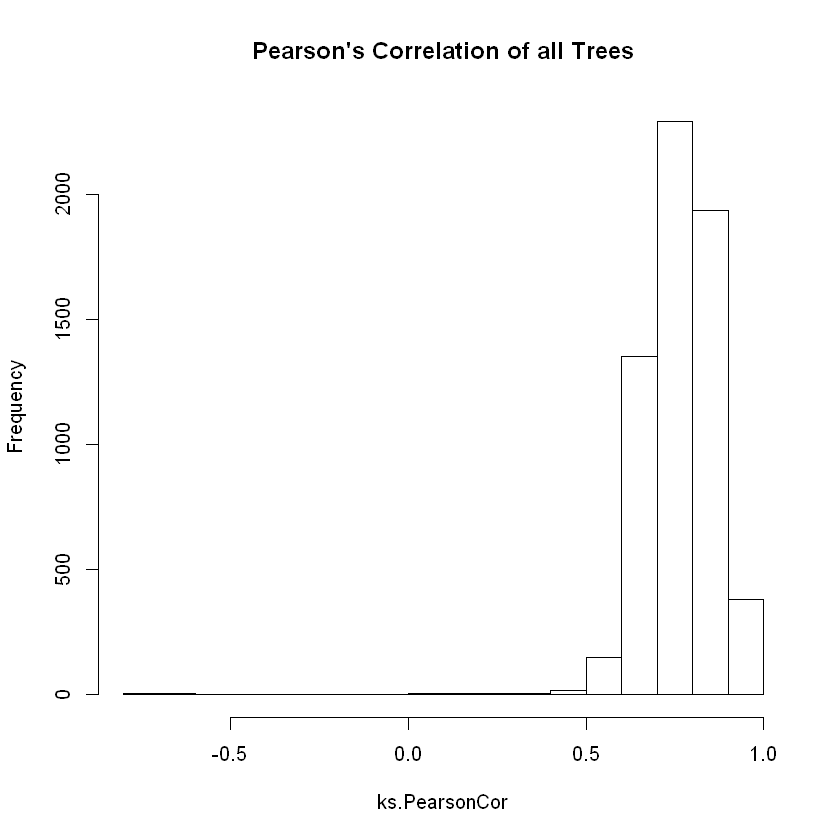

In [88]:
hist(ks.PearsonCor, main = "Pearson's Correlation of all Trees")

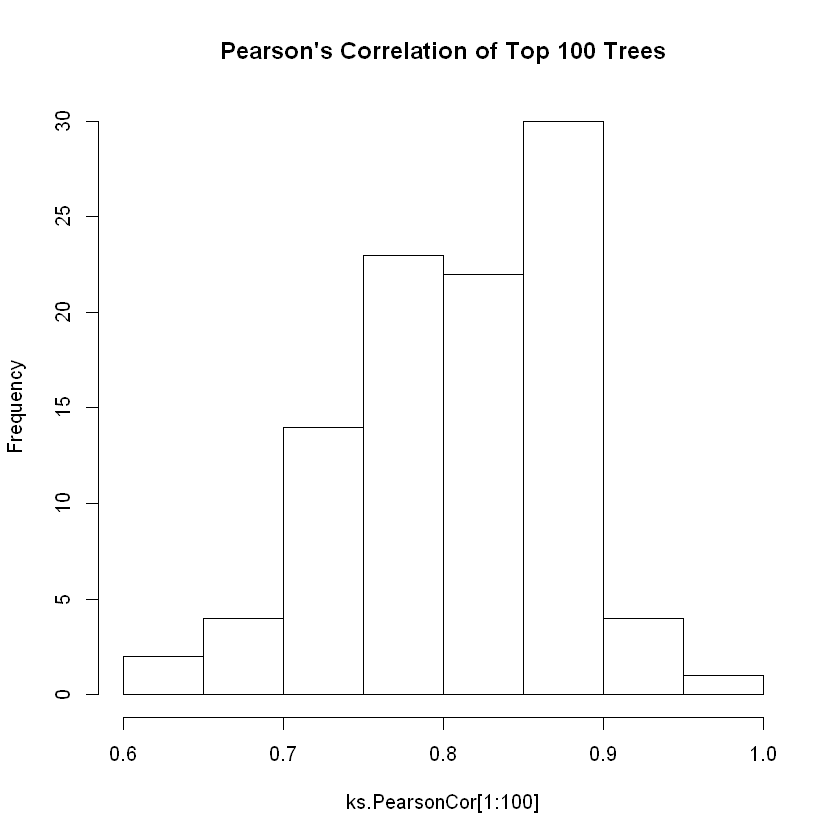

In [89]:
hist(ks.PearsonCor[1:100], main = "Pearson's Correlation of Top 100 Trees")

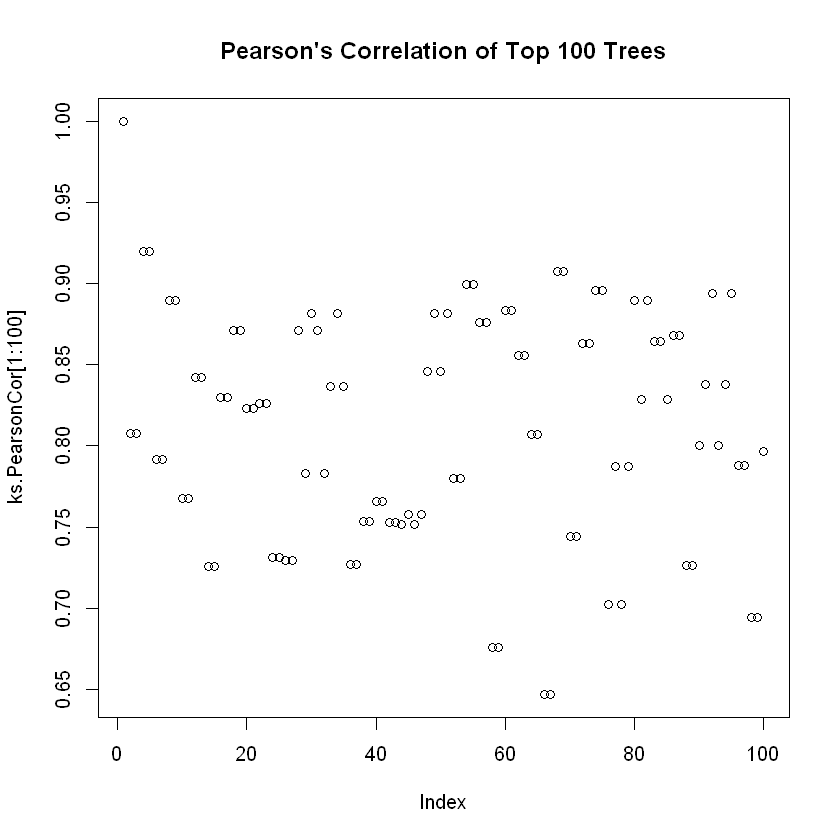

In [90]:
plot(ks.PearsonCor[1:100], main = "Pearson's Correlation of Top 100 Trees")

In [91]:
ks.df.Corr <- data.frame(Rank = 1:length(ks.PearsonCor),Score = alignments.1more$Score, Cor = ks.PearsonCor)

In [92]:
dim(ks.df.Corr)
head(ks.df.Corr)

[1] 12105     3

Rank,Score,Cor
1,1342,1.0000000
2,268,0.8078828
3,268,0.8078828
4,206,0.9200453
5,206,0.9200453
6,114,0.7918450


In [93]:
cor.test(ks.df.Corr$Score, ks.df.Corr$Cor)


	Pearson's product-moment correlation

data:  ks.df.Corr$Score and ks.df.Corr$Cor
t = 5.9381, df = 6164, p-value = 3.04e-09
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05055272 0.10019092
sample estimates:
       cor 
0.07541854 


Warning message:
"Removed 5939 rows containing missing values (geom_point)."

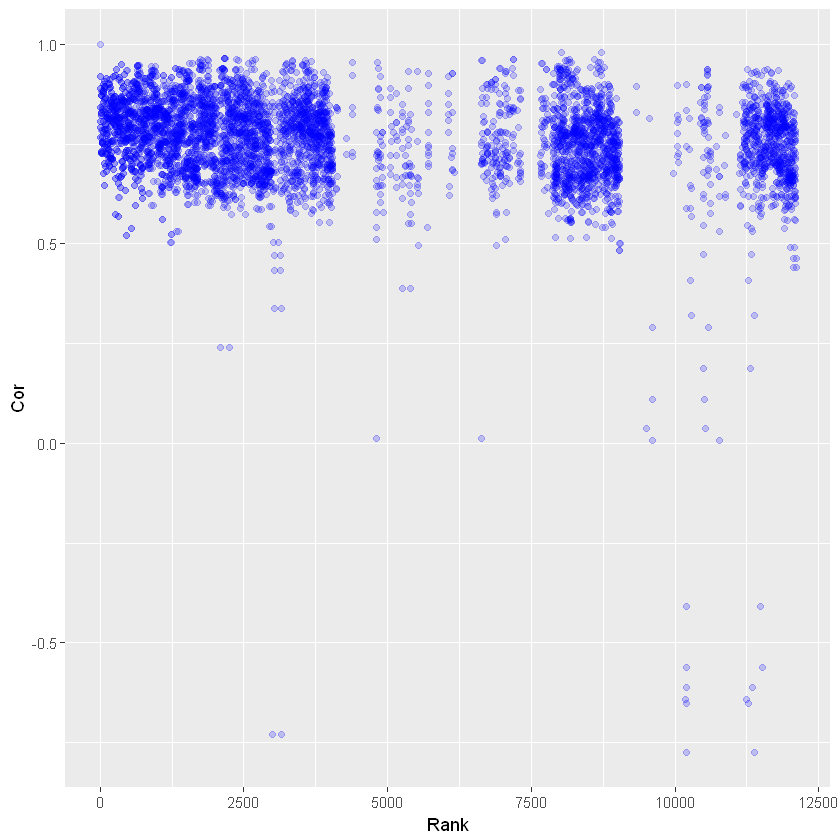

In [94]:
ggplot(ks.df.Corr, aes(x = Rank, y = Cor)) + geom_point(color = "blue", alpha = 0.2)

Warning message:
"Removed 5939 rows containing missing values (geom_point)."

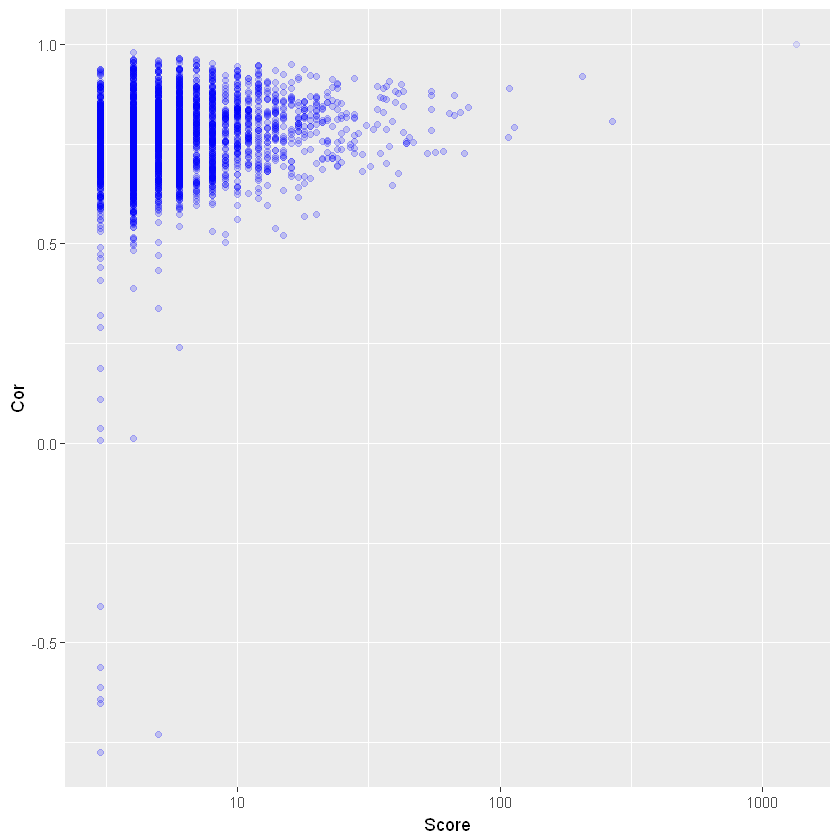

In [95]:
ggplot(ks.df.Corr, aes(x = Score, y = Cor)) + geom_point(color = "blue", alpha = 0.1) + scale_x_log10()

Warning message:
"Removed 5939 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 5939 rows containing missing values (geom_point)."

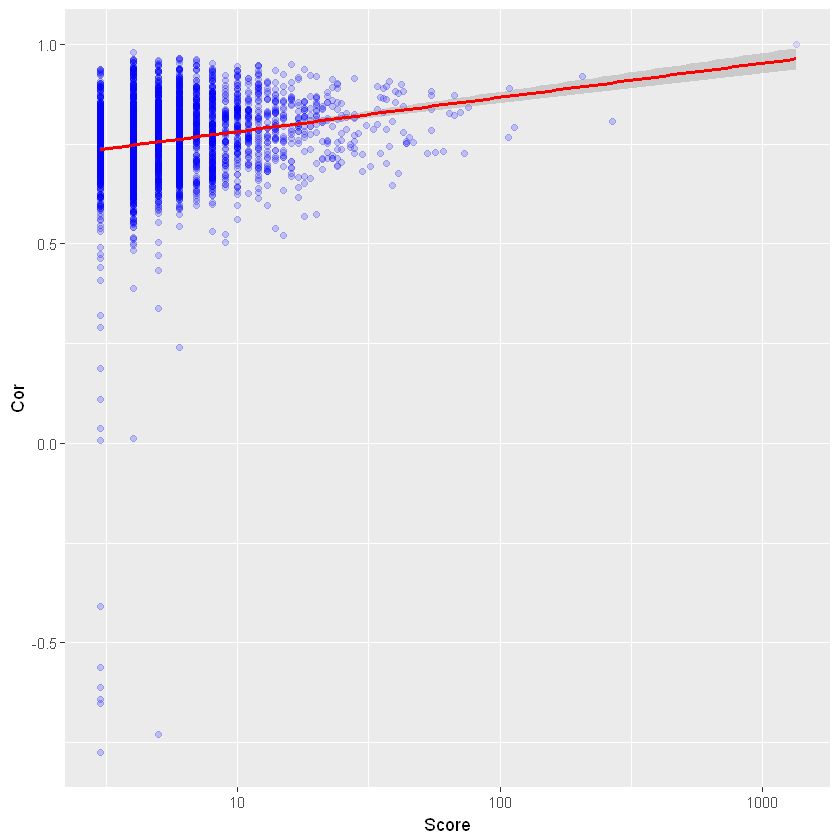

In [96]:
ggplot(ks.df.Corr, aes(x = Score, y = Cor)) + geom_point(color = "blue", alpha = 0.1) + scale_x_log10() + 
    geom_smooth(method = "lm", color = "red")

In [97]:
summary(lm(Cor~log10(Score), ks.df.Corr))


Call:
lm(formula = Cor ~ log10(Score), data = ks.df.Corr)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.51043 -0.06065  0.00843  0.06508  0.23368 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.695781   0.004697   148.1   <2e-16 ***
log10(Score) 0.085716   0.005790    14.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1132 on 6164 degrees of freedom
  (5939 observations deleted due to missingness)
Multiple R-squared:  0.03433,	Adjusted R-squared:  0.03418 
F-statistic: 219.2 on 1 and 6164 DF,  p-value: < 2.2e-16


#### pearson correlation, Spearman correlation

In [98]:
cor(ks.df.Corr$Cor, 
    ks.df.Corr$Score, 
    use = "complete.obs")

[1] 0.07541854

In [99]:
cor(ks.df.Corr$Cor, 
    ks.df.Corr$Score, 
    use = "complete.obs",
   method = "spearman")

[1] 0.1990333



# pvalue-EPIC correlation

### Top 1000 rank, score, correlation; data.frame

In [100]:
ks.df.Corr1000 = ks.df.Corr[1:1000,]
dim(ks.df.Corr1000)
head(ks.df.Corr1000)

[1] 1000    3

Rank,Score,Cor
1,1342,1.0000000
2,268,0.8078828
3,268,0.8078828
4,206,0.9200453
5,206,0.9200453
6,114,0.7918450


## read in p-value for top 1000 alignments

In [101]:
fname.pvalue <- "2018fun.alm.test100Top100"

In [102]:
alignments.top1000Test <- ReadTreeAlignmentsWithTest(fname.pvalue)

In [103]:
ks.df.Corr1000$pvalue <- alignments.top1000Test$pvalue
head(ks.df.Corr1000)

Rank,Score,Cor,pvalue
1,1342,1.0000000,0.0000e+00
2,268,0.8078828,2.2631e-218
3,268,0.8078828,1.4487e-248
4,206,0.9200453,0.0000e+00
5,206,0.9200453,0.0000e+00
6,114,0.7918450,6.3887e-101


## log(pvalue)

In [104]:
ks.df.Corr1000$logPvalue <- log10(ks.df.Corr1000$pvalue)
head(ks.df.Corr1000)

Rank,Score,Cor,pvalue,logPvalue
1,1342,1.0000000,0.0000e+00,-Inf
2,268,0.8078828,2.2631e-218,-217.6453
3,268,0.8078828,1.4487e-248,-247.8390
4,206,0.9200453,0.0000e+00,-Inf
5,206,0.9200453,0.0000e+00,-Inf
6,114,0.7918450,6.3887e-101,-100.1946


### plot p-value

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."

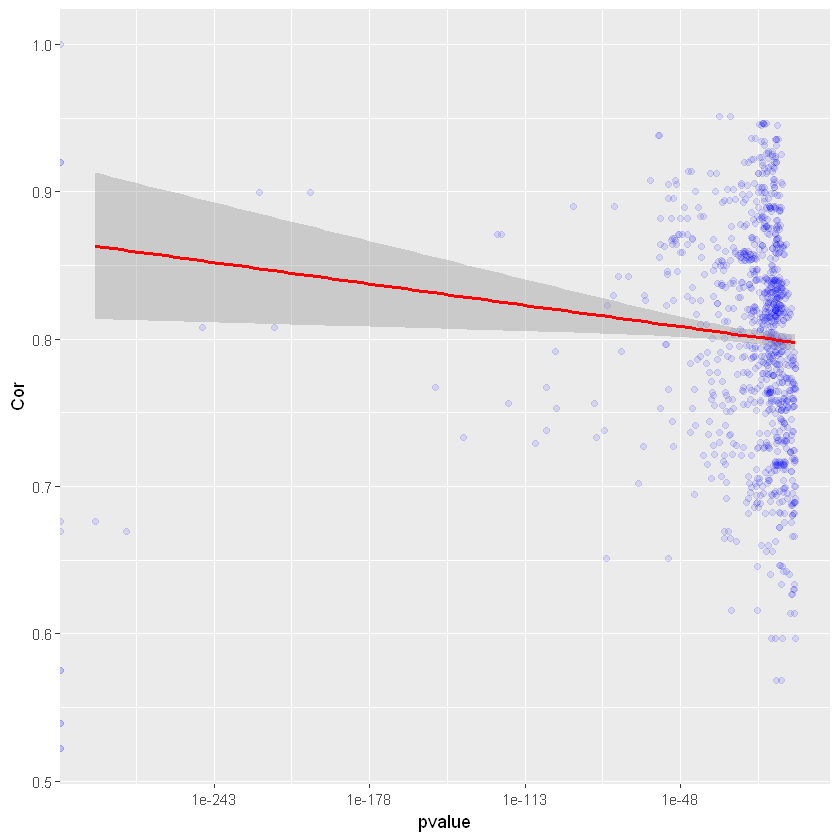

In [105]:
ggplot(ks.df.Corr1000, aes(x = pvalue, y = Cor)) + geom_point(color = "blue", alpha = 0.1) + scale_x_log10() + 
    geom_smooth(method = "lm", color = "red")

### plot logPvalue

Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."

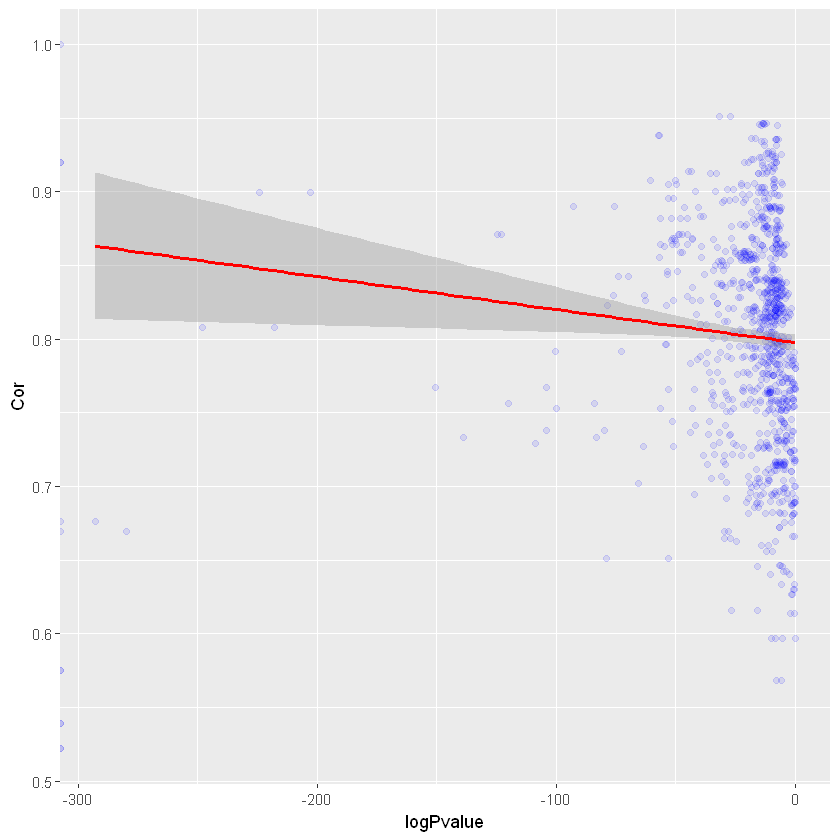

In [106]:
ggplot(ks.df.Corr1000, aes(x = logPvalue, y = Cor)) + geom_point(color = "blue", alpha = 0.1) + 
    geom_smooth(method = "lm", color = "red")

In [107]:
summary(lm(Cor~logPvalue, ks.df.Corr1000[ks.df.Corr1000$logPvalue> -500,]))


Call:
lm(formula = Cor ~ logPvalue, data = ks.df.Corr1000[ks.df.Corr1000$logPvalue > 
    -500, ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.231050 -0.046821  0.009024  0.052928  0.147379 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.977e-01  2.829e-03 281.970   <2e-16 ***
logPvalue   -2.235e-04  9.192e-05  -2.432   0.0152 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07222 on 987 degrees of freedom
Multiple R-squared:  0.005956,	Adjusted R-squared:  0.004949 
F-statistic: 5.913 on 1 and 987 DF,  p-value: 0.0152


#### pearson correlation, Spearman correlation

In [108]:
cor(ks.df.Corr1000[ks.df.Corr1000$logPvalue> -500,]$Cor,
    ks.df.Corr1000[ks.df.Corr1000$logPvalue> -500,]$logPvalue, 
    use = "complete.obs")

[1] -0.07717282

In [109]:
cor(ks.df.Corr1000[ks.df.Corr1000$logPvalue> -500,]$Cor,
    ks.df.Corr1000[ks.df.Corr1000$logPvalue> -500,]$logPvalue, 
    use = "complete.obs",
   method = "spearman")

[1] -0.2706356

### use "Spearman" Correlation for genes

In [110]:
CalculateSpearmanCorrelation <- function(x){
    # x is one row of alignments.1more
    Ts <- unlist(cell.df.expLog2[x$MatchS[[1]],])
    Tt <- unlist(cell.df.expLog2[x$MatchT[[1]],])
    if (sum(!(is.na(Ts) | is.na(Tt))) == 0) {
        return(NA)
    } else {
        return(cor(Ts,Tt, use = "complete.obs", method = "spearman"))
    }
}

In [111]:
CalculateSpearmanCorrelation(alignments.1more[2,])

[1] 0.8216869

In [112]:
dim(alignments.1more)

[1] 12105    12

In [113]:
ks.SpearmanCor <- rep(0,dim(alignments.1more)[1])
for (i in 1:dim(alignments.1more)[1]){
    x <- alignments.1more[i,]
    ks.SpearmanCor[i] <-  CalculateSpearmanCorrelation(x)
}

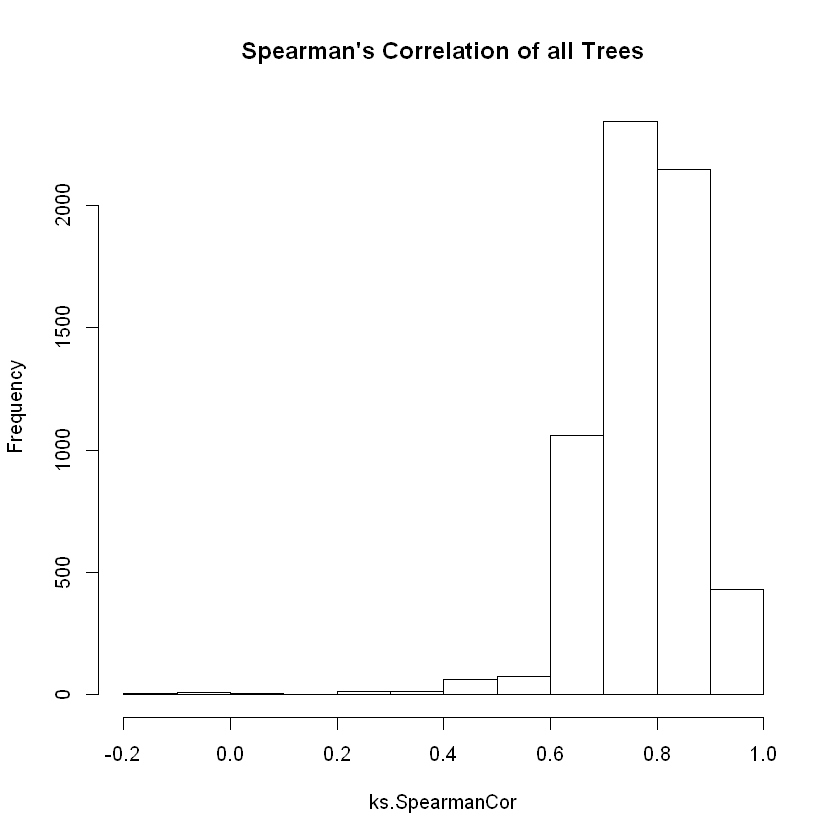

In [114]:
hist(ks.SpearmanCor, main = "Spearman's Correlation of all Trees")

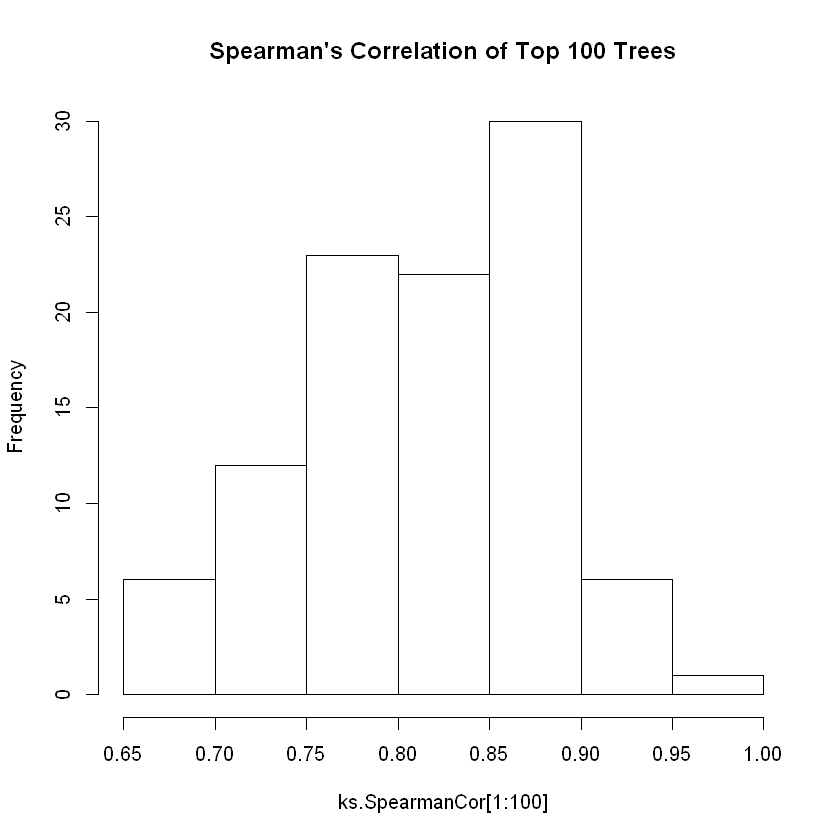

In [115]:
hist(ks.SpearmanCor[1:100], main = "Spearman's Correlation of Top 100 Trees")

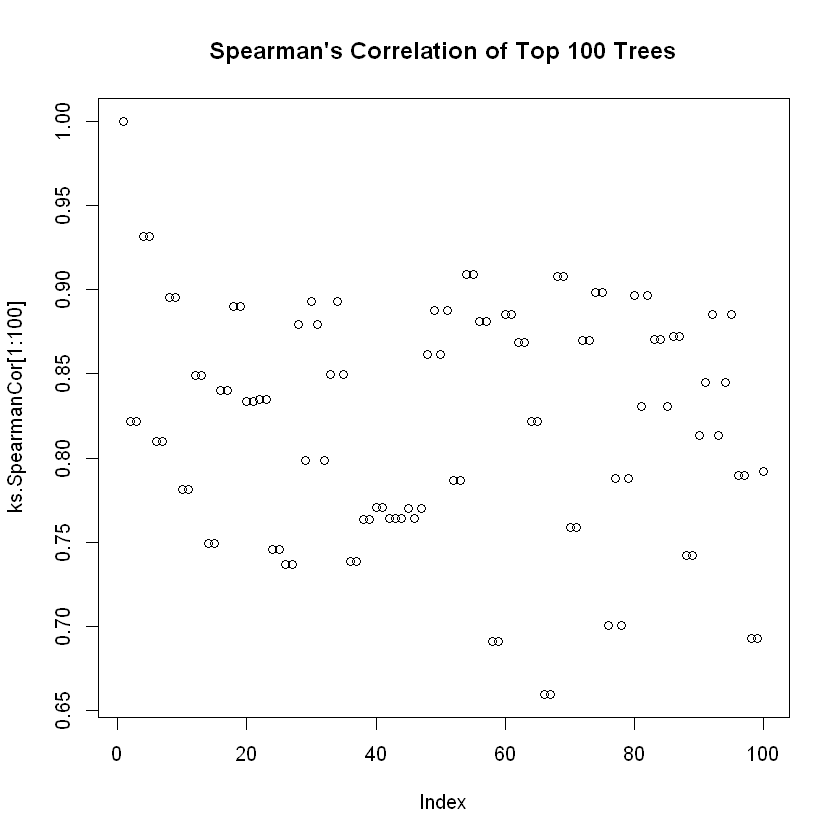

In [116]:
plot(ks.SpearmanCor[1:100], main = "Spearman's Correlation of Top 100 Trees")

In [117]:
ks.df.CorrSpearman <- data.frame(Rank = 1:length(ks.SpearmanCor),Score = alignments.1more$Score, Cor = ks.SpearmanCor)

In [118]:
dim(ks.df.CorrSpearman)
head(ks.df.CorrSpearman)

[1] 12105     3

Rank,Score,Cor
1,1342,1.0000000
2,268,0.8216869
3,268,0.8216869
4,206,0.9318943
5,206,0.9318943
6,114,0.8100577


In [119]:
cor.test(ks.df.CorrSpearman$Score, ks.df.CorrSpearman$Cor)


	Pearson's product-moment correlation

data:  ks.df.CorrSpearman$Score and ks.df.CorrSpearman$Cor
t = 6.3873, df = 6164, p-value = 1.812e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.05624015 0.10583409
sample estimates:
       cor 
0.08108731 


Warning message:
"Removed 5939 rows containing missing values (geom_point)."

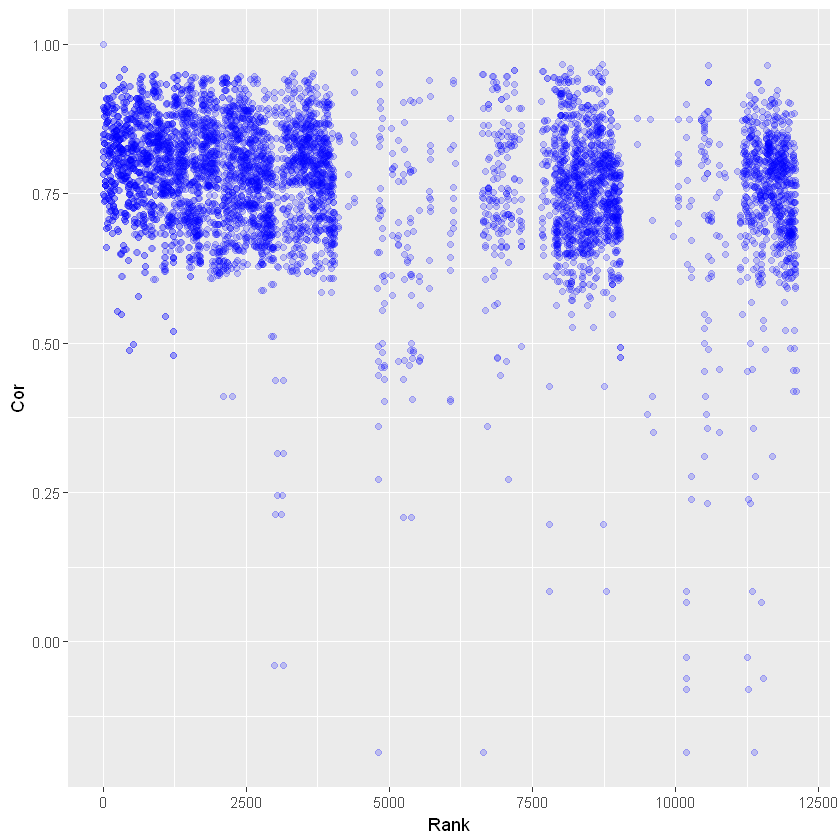

In [120]:
ggplot(ks.df.CorrSpearman, aes(x = Rank, y = Cor)) + geom_point(color = "blue", alpha = 0.2)

Warning message:
"Removed 5939 rows containing missing values (geom_point)."

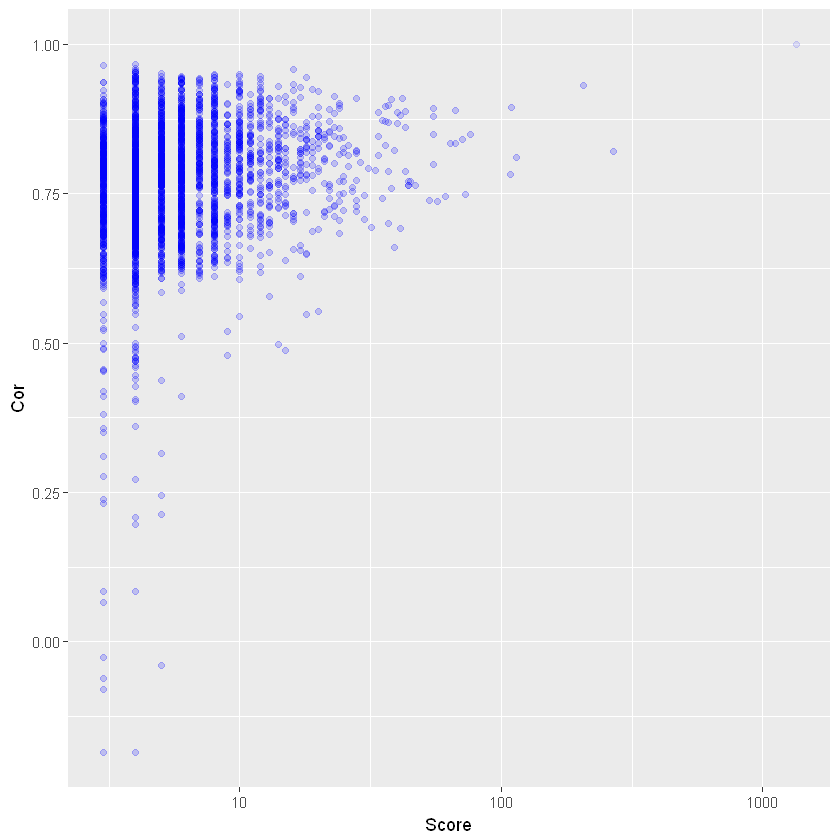

In [121]:
ggplot(ks.df.CorrSpearman, aes(x = Score, y = Cor)) + geom_point(color = "blue", alpha = 0.1) + scale_x_log10()

Warning message:
"Removed 5939 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 5939 rows containing missing values (geom_point)."

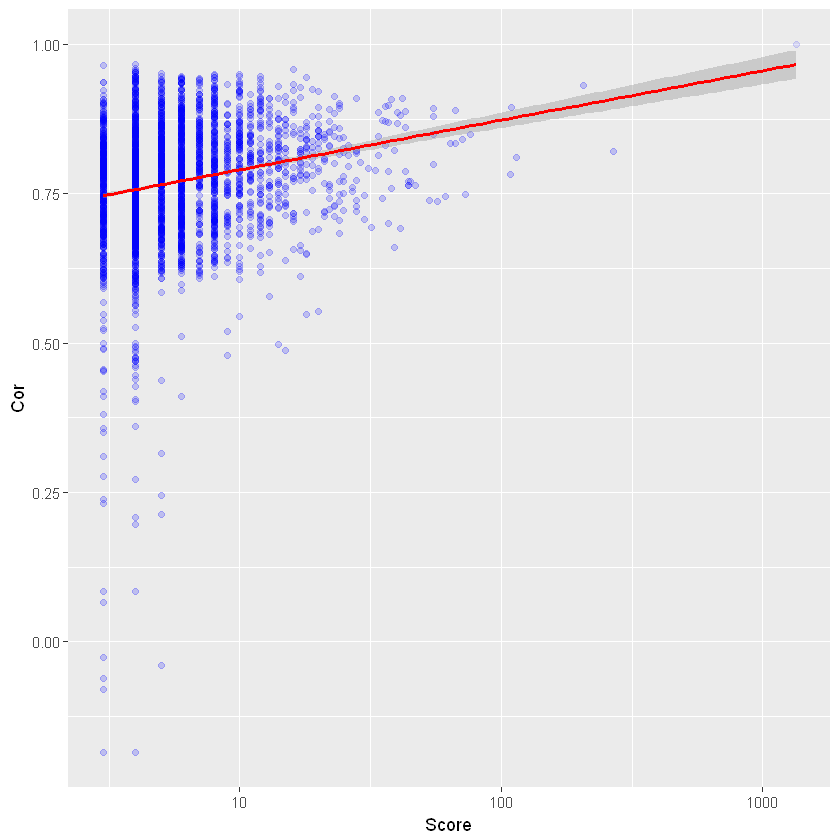

In [122]:
ggplot(ks.df.CorrSpearman, aes(x = Score, y = Cor)) + geom_point(color = "blue", alpha = 0.1) + scale_x_log10() + 
    geom_smooth(method = "lm", color = "red")

In [123]:
summary(lm(Cor~log10(Score), ks.df.CorrSpearman))


Call:
lm(formula = Cor ~ log10(Score), data = ks.df.CorrSpearman)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94206 -0.05756  0.01009  0.06647  0.21815 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.707347   0.004235  167.04   <2e-16 ***
log10(Score) 0.082865   0.005220   15.87   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1021 on 6164 degrees of freedom
  (5939 observations deleted due to missingness)
Multiple R-squared:  0.03927,	Adjusted R-squared:  0.03912 
F-statistic:   252 on 1 and 6164 DF,  p-value: < 2.2e-16


#### pearson correlation, Spearman correlation

In [124]:
cor(ks.df.CorrSpearman$Cor, 
    ks.df.CorrSpearman$Score, 
    use = "complete.obs")

[1] 0.08108731

In [125]:
cor(ks.df.CorrSpearman$Cor, 
    ks.df.CorrSpearman$Score, 
    use = "complete.obs",
   method = "spearman")

[1] 0.2036689



# pvalue-EPIC correlation

### Top 1000 rank, score, correlation; data.frame

In [126]:
ks.df.CorrSpearman1000 = ks.df.CorrSpearman[1:1000,]
dim(ks.df.CorrSpearman1000)
head(ks.df.CorrSpearman1000)

[1] 1000    3

Rank,Score,Cor
1,1342,1.0000000
2,268,0.8216869
3,268,0.8216869
4,206,0.9318943
5,206,0.9318943
6,114,0.8100577


## read in p-value for top 1000 alignments

In [127]:
fname.pvalue <- "2018fun.alm.test100Top100"

In [128]:
alignments.top1000Test <- ReadTreeAlignmentsWithTest(fname.pvalue)

In [129]:
ks.df.CorrSpearman1000$pvalue <- alignments.top1000Test$pvalue
head(ks.df.CorrSpearman1000)

Rank,Score,Cor,pvalue
1,1342,1.0000000,0.0000e+00
2,268,0.8216869,2.2631e-218
3,268,0.8216869,1.4487e-248
4,206,0.9318943,0.0000e+00
5,206,0.9318943,0.0000e+00
6,114,0.8100577,6.3887e-101


## log(pvalue)

In [130]:
ks.df.CorrSpearman1000$logPvalue <- log10(ks.df.CorrSpearman1000$pvalue)
head(ks.df.CorrSpearman1000)

Rank,Score,Cor,pvalue,logPvalue
1,1342,1.0000000,0.0000e+00,-Inf
2,268,0.8216869,2.2631e-218,-217.6453
3,268,0.8216869,1.4487e-248,-247.8390
4,206,0.9318943,0.0000e+00,-Inf
5,206,0.9318943,0.0000e+00,-Inf
6,114,0.8100577,6.3887e-101,-100.1946


### plot p-value

Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Transformation introduced infinite values in continuous x-axis"Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."

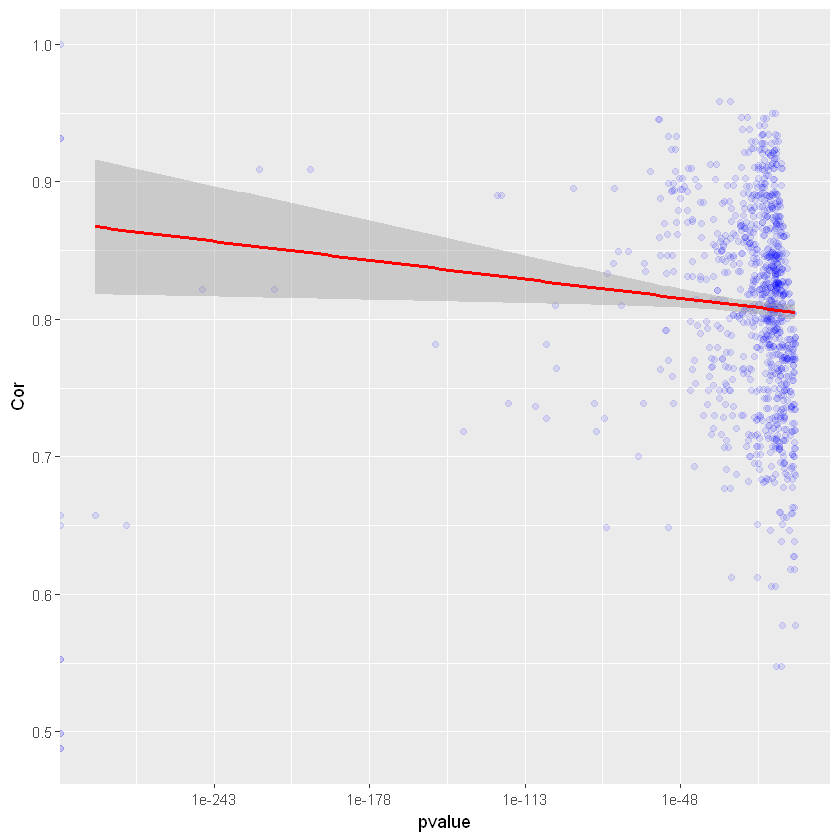

In [131]:
ggplot(ks.df.CorrSpearman1000, aes(x = pvalue, y = Cor)) + geom_point(color = "blue", alpha = 0.1) + scale_x_log10() + 
    geom_smooth(method = "lm", color = "red")

### plot logPvalue

Warning message:
"Removed 11 rows containing non-finite values (stat_smooth)."

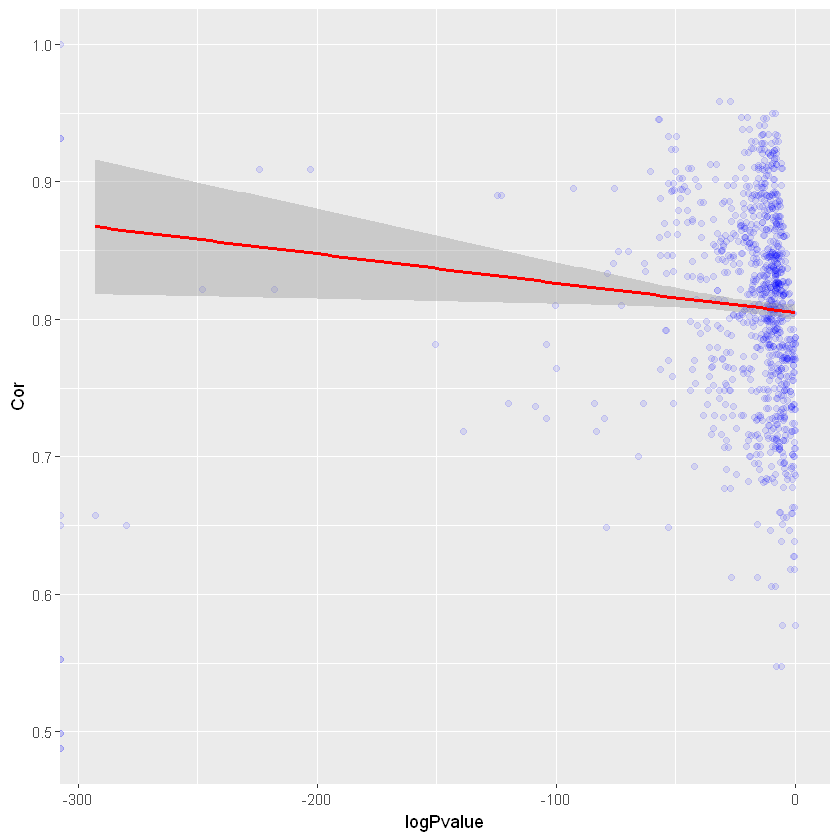

In [132]:
ggplot(ks.df.CorrSpearman1000, aes(x = logPvalue, y = Cor)) + geom_point(color = "blue", alpha = 0.1) + 
    geom_smooth(method = "lm", color = "red")

In [133]:
summary(lm(Cor~logPvalue, ks.df.CorrSpearman1000[ks.df.CorrSpearman1000$logPvalue> -500,]))


Call:
lm(formula = Cor ~ logPvalue, data = ks.df.CorrSpearman1000[ks.df.CorrSpearman1000$logPvalue > 
    -500, ])

Residuals:
      Min        1Q    Median        3Q       Max 
-0.259583 -0.047178  0.007959  0.052934  0.147382 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.052e-01  2.797e-03 287.926   <2e-16 ***
logPvalue   -2.121e-04  9.086e-05  -2.334   0.0198 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07139 on 987 degrees of freedom
Multiple R-squared:  0.005489,	Adjusted R-squared:  0.004481 
F-statistic: 5.447 on 1 and 987 DF,  p-value: 0.0198


#### pearson correlation, Spearman correlation

In [134]:
cor(ks.df.CorrSpearman1000[ks.df.CorrSpearman1000$logPvalue> -500,]$Cor, ks.df.CorrSpearman1000[ks.df.CorrSpearman1000$logPvalue> -500,]$logPvalue, use = "complete.obs")

[1] -0.0740869

In [135]:
cor(ks.df.CorrSpearman1000[ks.df.CorrSpearman1000$logPvalue> -500,]$Cor, 
    ks.df.CorrSpearman1000[ks.df.CorrSpearman1000$logPvalue> -500,]$logPvalue, 
    use = "complete.obs",
   method = "spearman")

[1] -0.2827993